# Part-B--- EDA and STATS Mini Project-FIFA Case Study

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using a data-based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total of 15 players are required. Player data for all teams have been acquired from FIFA.
This data contains information about the players, the clubs they are currently playing for,and various performance measures. There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

Data:
The data contains details for over 25490 players playing in various football clubs in Europe.
It contains information on age, skill rating, wages, player value, etc.

# Data Preprocessing:


1.  Import the necessary libraries and read the data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [8]:
df_var=pd.read_csv('fifa_ variable_information.csv')
df_var

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


In [29]:
df_fifa=pd.read_csv('fifa.csv')
df_fifa.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'fifa.csv'

2.  Drop any columns that you deem unnecessary for analysis.
    Hint: At least keep the following columns
     ('ID','Name','Age','Nationality','Overall','Potential','Value','Wage','Joined','Preferred Foot',
      'Contract Valid Until', 'Height', 'Weight', 'Penalties', 'Release Clause',’ International
      Reputation’, ‘Position’)
    We encourage you to perform an analysis including other variables apart from the above variables.


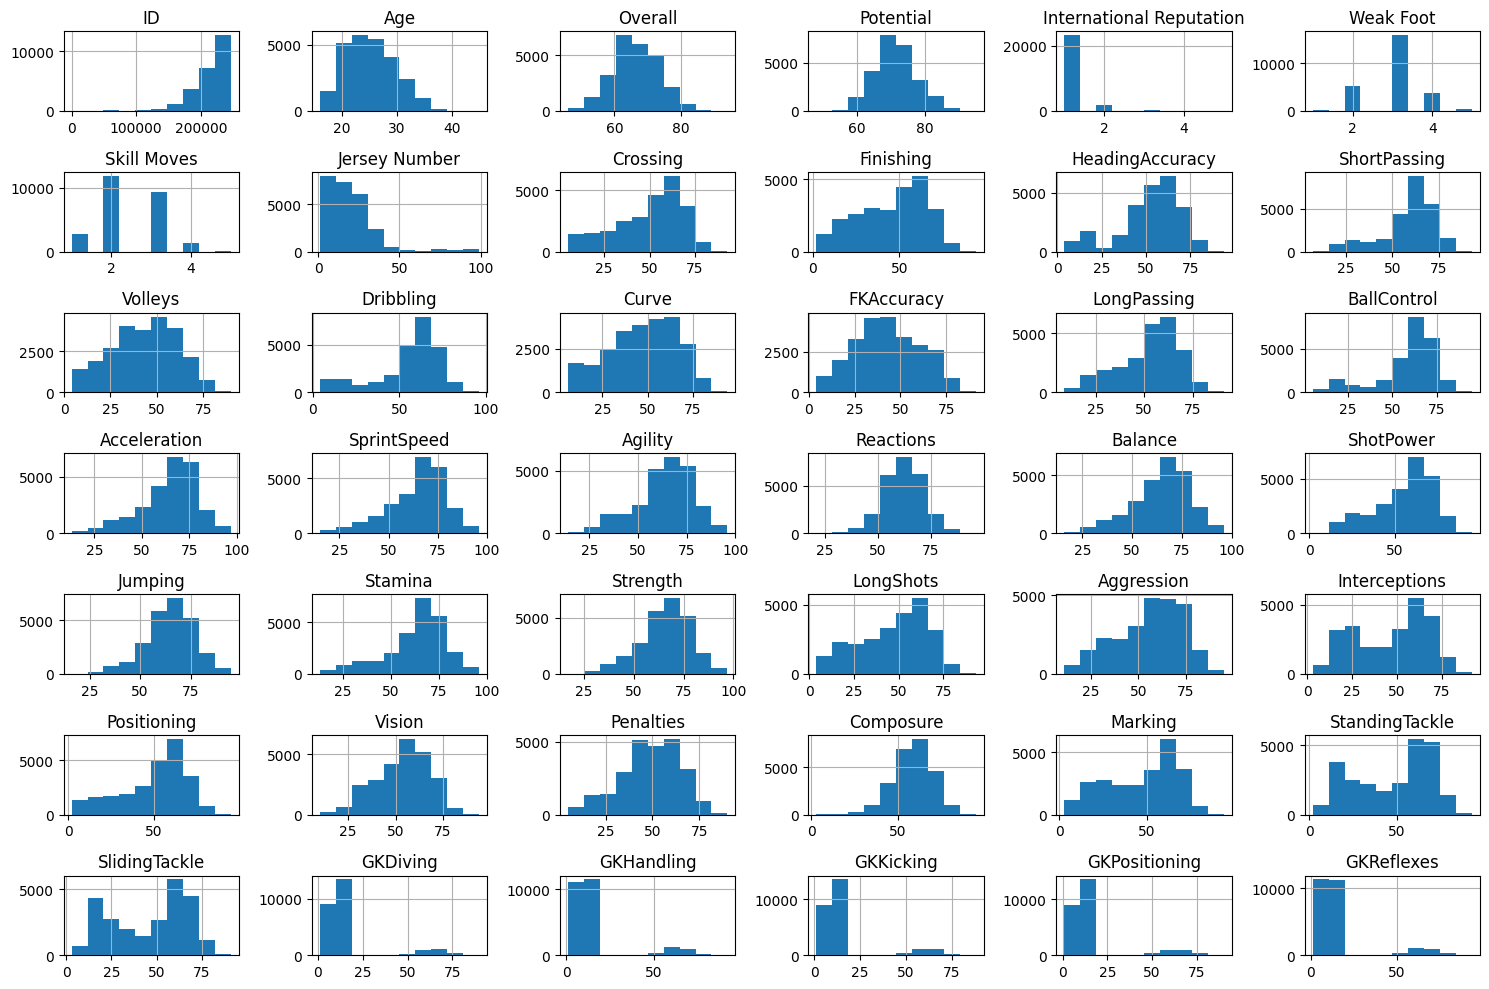

In [8]:
numeric_columns = df_fifa.select_dtypes(include=[np.number])
# Plot histograms for numeric columns
numeric_columns.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [8]:
gk_players = df_fifa[df_fifa['Position'] == 'GK'][['Name', 'ID', 'Wage', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Overall']]

In [12]:
top_gk_players = gk_players.sort_values(by='Overall', ascending=False).head(15)
print(top_gk_players.head(10))

                Name      ID   Wage  GKDiving  GKHandling  GKKicking  \
24826         De Gea  193080  €260K      90.0        85.0       87.0   
20448         De Gea  193080  €260K      90.0        85.0       87.0   
16245       J. Oblak  200389   €94K      86.0        92.0       78.0   
21686    T. Courtois  192119  €240K      85.0        91.0       72.0   
16367      G. Buffon    1179   €77K      88.0        87.0       74.0   
18432  S. Handanovič  162835  €110K      87.0        86.0       69.0   
2056       H. Lloris  167948  €150K      88.0        84.0       68.0   
13876       K. Navas  193041  €195K      90.0        81.0       75.0   
23059    W. Szczęsny  186153  €125K      85.0        81.0       71.0   
14299        Alisson  212831  €115K      83.0        81.0       85.0   

       GKPositioning  GKReflexes  Overall  
24826           88.0        94.0       91  
20448           88.0        94.0       91  
16245           88.0        89.0       90  
21686           86.0        88.

In [4]:
columns_to_keep = ['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Value', 'Wage', 
                   'Joined', 'Preferred Foot', 'Contract Valid Until', 'Height', 'Weight', 
                   'Penalties', 'Release Clause', 'International Reputation', 'Position','Stamina','Strength','SprintSpeed']
df= df_fifa[columns_to_keep]
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Joined,Preferred Foot,Contract Valid Until,Height,Weight,Penalties,Release Clause,International Reputation,Position,Stamina,Strength,SprintSpeed
0,240331,P. Camará,21,Guinea Bissau,58,69,€220K,€1K,"Jun 8, 2017",Right,2019,6'1,161lbs,58.0,€429K,1.0,LS,58.0,62.0,80.0
1,183465,J. Rodwell,27,England,68,68,€925K,€16K,"Aug 23, 2018",Right,2019,6'2,172lbs,57.0,€1.8M,2.0,CM,51.0,71.0,61.0
2,205186,P. Gazzaniga,26,Argentina,74,78,€5M,€46K,"Aug 23, 2017",Right,2022,6'5,198lbs,41.0,€9.6M,1.0,GK,45.0,67.0,65.0
3,233531,Y. Soteldo,21,Venezuela,71,81,€3.8M,€6K,"Jan 11, 2018",Right,2018,5'3,121lbs,71.0,€6.1M,1.0,CAM,60.0,30.0,81.0
4,243718,R. Koot,18,Netherlands,56,68,€120K,€1K,"Jul 1, 2016",Right,2020,6'1,176lbs,15.0,€198K,1.0,GK,20.0,45.0,19.0


In [57]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Value                        object
Wage                         object
Joined                       object
Preferred Foot               object
Contract Valid Until         object
Height                       object
Weight                       object
Penalties                   float64
Release Clause               object
International Reputation    float64
Position                     object
Stamina                     float64
Strength                    float64
SprintSpeed                 float64
dtype: object

3.    The following columns need to be converted for further analysis:

<img src="Screenshot 2023-08-10 104744.png" alt="Alt Text" width="600"/>
<p style="text-align: center;">. (You might encounter Nan values in the above columns. Pandas treat Nan values as a
float. Please keep that in mind when making the conversions.)
</p>


In [5]:
# Extract year from the 'Joined' column and convert to int
def extract_year(x):
    try:
        return int(x[-4:])
    except:
        return None

df['Joined'] = df['Joined'].apply(extract_year)
df['Joined'] = df['Joined'].astype('Int64')

In [6]:
# Remove euro symbol and apply the conversion function to the 'Value','Wage','Release Clause'columns
df['Value'] = df['Value'].str.replace('€', '')
df['Wage'] = df['Wage'].str.replace('€', '')
df['Release Clause'] = df['Release Clause'].str.replace('€', '')

In [7]:
# Convert 'Contract Valid Until' column to datetime
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [8]:
# Convert 'Height' column from inches to float with decimal points
df['Height'] = df['Height'].str.replace("'", ".").astype(float)

In [9]:
# Convert 'Weight' column from inches to float with decimal points
df['Weight'] = df['Weight'].str.replace("lbs", "").astype(float)

In [10]:
#Converting K/M  to zeros in value and wage columns
def convert_and_multiply(value):
    multiplier = 1
    if value[-1] == 'K':
        multiplier = 1000
    elif value[-1] in ['M', 'm']:
        multiplier = 1000000
    try:
        return float(value[:-1]) * multiplier
    except ValueError:
        return None  # Handle cases where the conversion fails

# Apply the conversion and multiplication function to the 'Value' and 'Wage' columns
df['Value'] = df['Value'].apply(convert_and_multiply)
df['Wage'] = df['Wage'].apply(convert_and_multiply)

In [11]:
#Converting K/M  to zeros in Release Clause
def convert_and_multiply(value):
    if isinstance(value, str):  # Check if the value is a string
        multiplier = 1
        if value[-1] == 'K':
            multiplier = 1000
        elif value[-1] in ['M', 'm']:
            multiplier = 1000000
        try:
            return float(value[:-1]) * multiplier
        except ValueError:
            return None  # Handle cases where the conversion fails
    else:
        return value  # Return the original value if it's already a float
df['Release Clause'] = df['Release Clause'].apply(convert_and_multiply)

4.  Check the duplicate records and do appropriate treatments.

In [12]:
print('Original count of records with duplicated value: ',df.shape[0])

Original count of records with duplicated value:  25490


In [13]:
# Count the number of completely duplicate records
duplicate_count = df.duplicated(keep='first').sum()

# Display the number of completely duplicate records
print("Number of completely duplicate records:", duplicate_count)

Number of completely duplicate records: 11833


In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
print('Count of records without duplicated value: ',df.shape[0])

Count of records without duplicated value:  13657


5.  Check the variation of the features.
   If you are performing variance and standard deviation. Kindly explain why the variances of the variables are higher than the    standard deviation.Also, explain which one tells the exact variation of the features. Based on this analysis decide which        feature is not needed.


In [16]:
variance_values = df.var()
std_deviation_values = df.std()

# Create a new DataFrame
stats_df = pd.DataFrame({'Variance': variance_values, 'Standard Deviation': std_deviation_values})
stats_df

,Variance,Standard Deviation
Age,2.157549e+01,4.644942
Contract Valid Until,NaN,459 days 18:31:23.838867304
Height,2.014039e-01,0.44878
ID,8.921307e+08,29868.556965
International Reputation,1.508923e-01,0.388449
Joined,4.491706e+00,2.119364
Overall,4.763576e+01,6.901866
Penalties,2.469373e+02,15.71424
Potential,3.738750e+01,6.114532
Release Clause,1.191494e+14,10915558.364841


The reason why variances can be higher than standard deviations lies in the nature of the calculations. Variance involves squaring the differences from the mean, resulting in squared units. This squared unit can lead to larger numbers than the original data. When you take the square root to calculate standard deviation, you're "undoing" the squaring effect, which can result in smaller numbers.

Both variance and standard deviation provide information about the variation within a dataset. However, the standard deviation is more intuitive and interpretable since it's in the same units as the original data. It directly represents the "average" amount of deviation from the mean. So, in most cases, standard deviation is the preferred measure to understand the exact variation of the features.

In [17]:
# Dropping the specified columns from the DataFrame-as these columns are not needed for further analysis
columns_to_drop = ['Strength', 'Stamina', 'SprintSpeed', 'Joined', 'Penalties']
df = df.drop(columns=columns_to_drop)

In [18]:
df

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,Contract Valid Until,Height,Weight,Release Clause,International Reputation,Position
0,240331,P. Camará,21,Guinea Bissau,58,69,220000.0,1000.0,Right,2019-01-01,6.1,161.0,429000.0,1.0,LS
1,183465,J. Rodwell,27,England,68,68,925000.0,16000.0,Right,2019-01-01,6.2,172.0,1800000.0,2.0,CM
2,205186,P. Gazzaniga,26,Argentina,74,78,5000000.0,46000.0,Right,2022-01-01,6.5,198.0,9600000.0,1.0,GK
3,233531,Y. Soteldo,21,Venezuela,71,81,3800000.0,6000.0,Right,2018-01-01,5.3,121.0,6100000.0,1.0,CAM
4,243718,R. Koot,18,Netherlands,56,68,120000.0,1000.0,Right,2020-01-01,6.1,176.0,198000.0,1.0,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25461,242116,M. Etuin,22,France,62,69,425000.0,2000.0,Left,2020-01-01,5.9,143.0,829000.0,1.0,CM
25470,237387,D. Dalling,19,England,54,71,150000.0,1000.0,Right,2019-01-01,5.9,154.0,379000.0,1.0,CAM
25477,223132,K. Keleş,30,Turkey,68,68,650000.0,7000.0,Left,2019-01-01,5.9,148.0,1300000.0,1.0,LB
25482,237745,H. Miyazawa,29,Japan,63,63,350000.0,1000.0,Right,2021-01-01,6.0,159.0,438000.0,1.0,CB


In [19]:
df.dtypes

ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Potential                            int64
Value                              float64
Wage                               float64
Preferred Foot                      object
Contract Valid Until        datetime64[ns]
Height                             float64
Weight                             float64
Release Clause                     float64
International Reputation           float64
Position                            object
dtype: object

6.  Check for missing values and do imputations where necessary.Note: Do the appropriate imputation based on the distribution.
    Hints: Few analyses are listed below to decide which imputation method to perform.
    1. Skewness level verification
    2. Kurtosis level measurement identification.Explain what the Skewness and Kurtosis depicted.
    3. Distribution plots like KDE, Distribution plot, Box plot, etc

In [26]:
# Check for null values
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Value                        192
Wage                         185
Preferred Foot                36
Contract Valid Until         221
Height                        36
Weight                        36
Release Clause              1171
International Reputation      36
Position                      47
dtype: int64

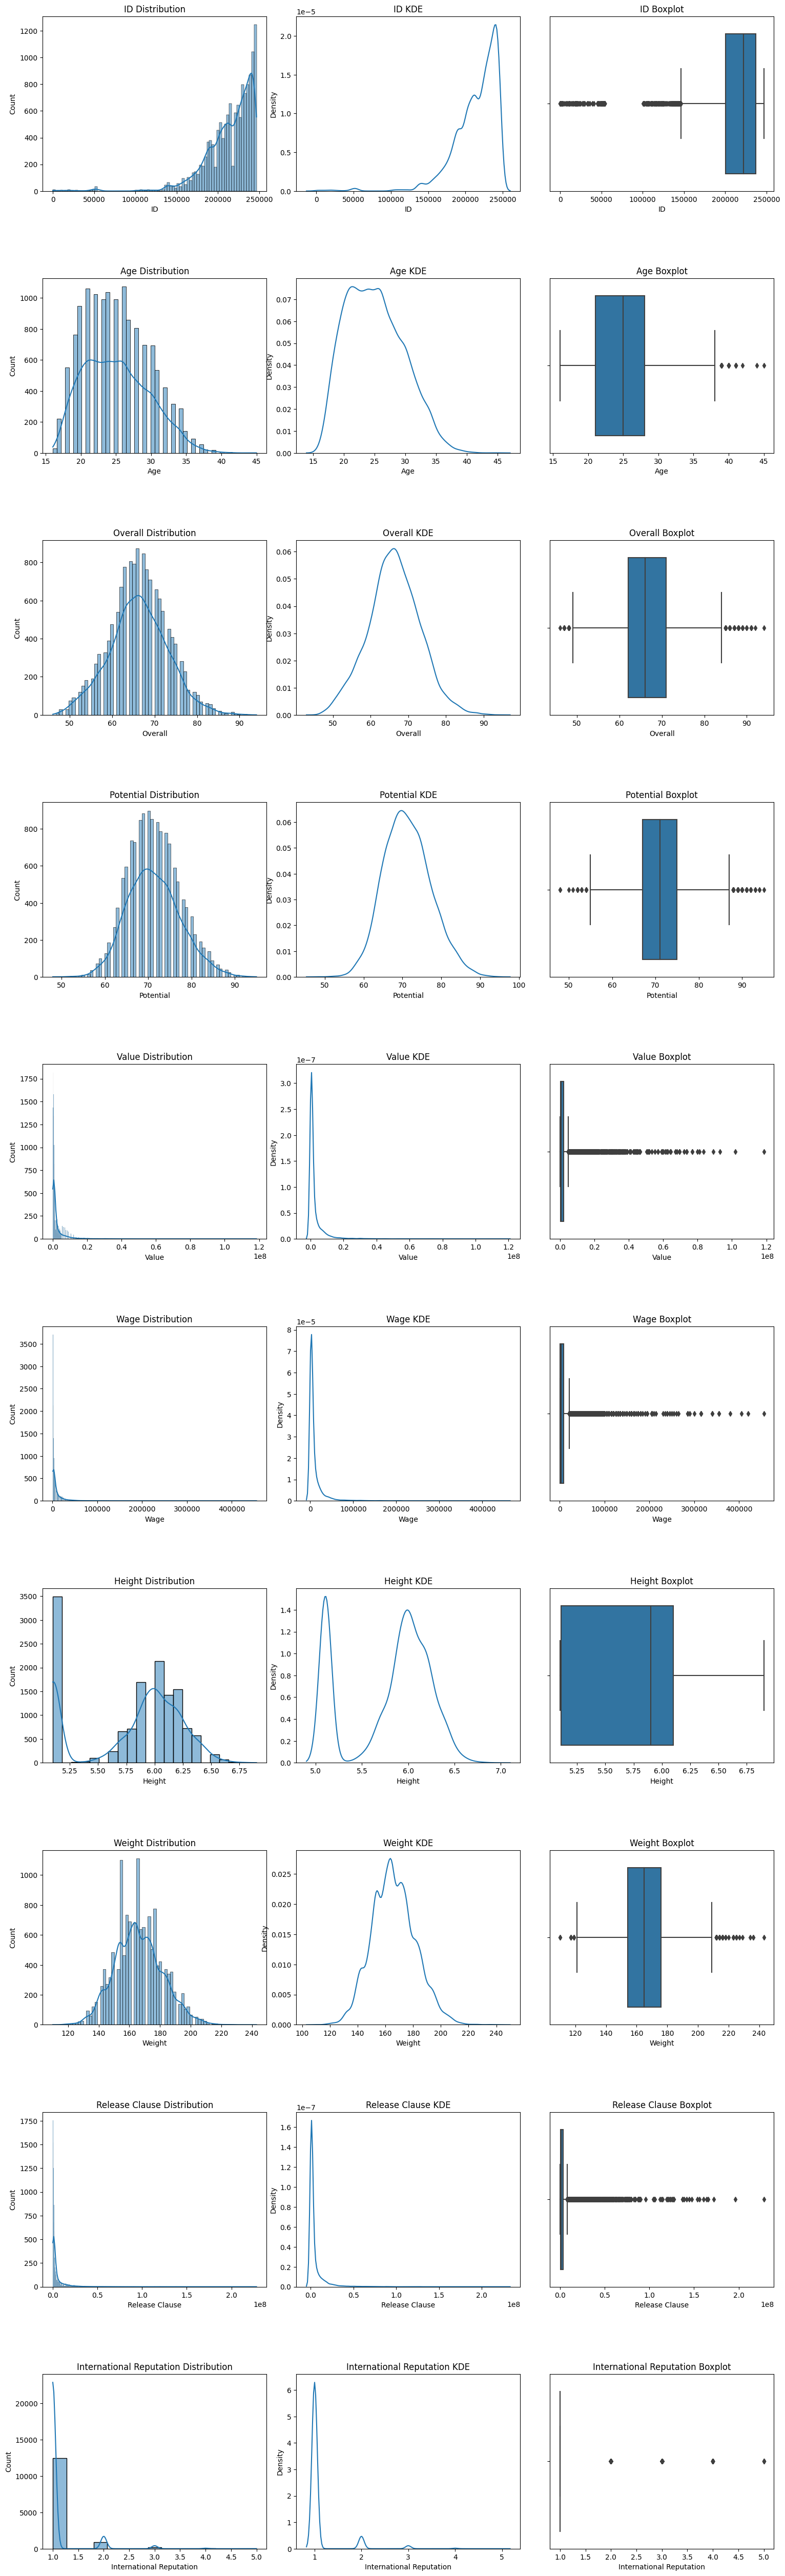

In [30]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
# Set up the layout for the subplots with increased vertical spacing
num_cols = len(numerical_columns.columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=3, figsize=(15, 5*num_cols), sharex=False, sharey=False)
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Increase the vertical spacing here
# Iterate through numerical columns and create plots
for i, col in enumerate(numerical_columns.columns):
    # Distribution plot
    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} Distribution')

    # KDE plot
    sns.kdeplot(data=df, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} KDE')

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[i, 2])
    axes[i, 2].set_title(f'{col} Boxplot')

plt.show()

In [31]:
# Replace null values with median (or mean) for specific columns
df['Value'].fillna(df['Value'].median(), inplace=True)
df['Wage'].fillna(df['Wage'].median(), inplace=True)
df['Height'].fillna(df['Height'].median(), inplace=True)
df['Release Clause'].fillna(df['Release Clause'].median(), inplace=True)
df['International Reputation'].fillna(df['International Reputation'].median(), inplace=True)
# Replace null values with mean for Weight
df['Weight'].fillna(df['Weight'].mean(), inplace=True)

In [33]:
#rechecking after treating null values of numerical columns
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Value                         0
Wage                          0
Preferred Foot               36
Contract Valid Until        221
Height                        0
Weight                        0
Release Clause                0
International Reputation      0
Position                     47
dtype: int64

In [37]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Assuming your DataFrame is named df
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate skewness and kurtosis values
skewness_values = numerical_columns.apply(skew)
kurtosis_values = numerical_columns.apply(kurtosis)

# Create a DataFrame to store skewness and kurtosis values
skew_kurtosis_df = pd.DataFrame({
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values})
# Display the DataFrame
print(skew_kurtosis_df)

                          Skewness   Kurtosis
ID                       -2.279883   9.761354
Age                       0.392393  -0.458074
Overall                   0.070044   0.092702
Potential                 0.261027   0.011930
Value                     7.179907  79.577730
Wage                      7.710506  91.199671
Height                   -0.549451  -1.039831
Weight                    0.228241   0.122908
Release Clause            7.470849  85.171715
International Reputation  4.110533  19.425939


In [41]:
# Replace null values in 'Preferred Foot' column with the mode
df['Preferred Foot'].fillna(df['Preferred Foot'].mode()[0], inplace=True)

In [45]:
# Drop rows with null values in 'Position' column
df.dropna(subset=['Position'], inplace=True)

# Drop rows with null values in 'Contract Valid Until' column
df.dropna(subset=['Contract Valid Until'], inplace=True)

In [46]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Preferred Foot              0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
International Reputation    0
Position                    0
dtype: int64

7. Find out If there is any player above 2.0*IQR – Q1 and below 2.0*IQR + Q3. What would happen if the data has above or below      the mentioned values and display the names of the players?


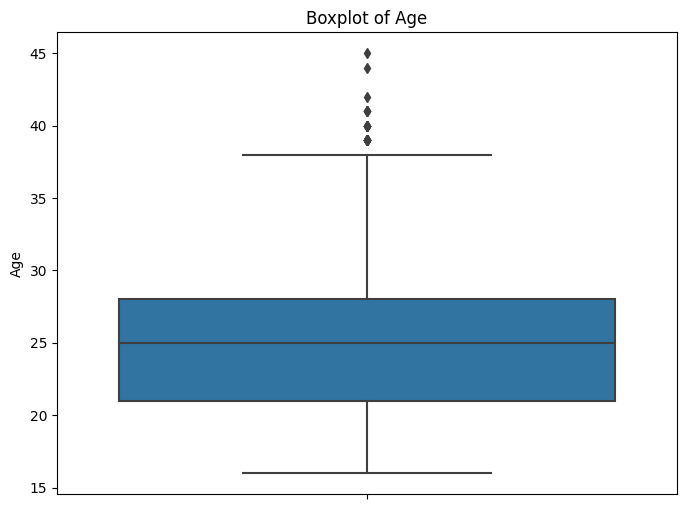

Total players above 2.0IQR + Q1 for Age: 201
Names: ['D. Bulman', 'J. Thomsen', 'Javi Guerra', 'Bruno Alves', 'T. Gebauer', 'N. Tyson', 'Jorge Molina', 'R. Maeda', 'A. Mintzel', 'J. Carranza', 'C. Puggioni', 'Kwak Tae Hwi', 'Zhou Ting', 'M. Ogasawara', 'S. Nelson', 'M. Pedersen', 'J. Drobný', 'S. Bertoli', 'K. Beckerman', 'M. Gelabert', 'A. Johansson', 'N. Ramos', 'T. Kuszczak', 'A. Nef', 'José Juan', 'J. Speroni', 'H. Campagnaro', 'M. Domizzi', 'D. De fauw', 'F. Oreja', 'J. Sand', 'R. Braña', 'A. Barzagli', 'M. Ratajczak', 'A. Pomini', 'M. Tacalfred', 'C. Esquivel', 'O. Pérez', 'L. Delgado', 'J. Aigner', 'S. Narazaki', 'Luis García', 'R. Green', 'A. Cole', 'L. Pocrnjic', 'J. Murphy', 'T. Buffel', 'Ryang Yong Gi', 'S. Andersen', 'M. González', 'C. Canío', 'Y. Nishibe', 'L. Reddy', 'C. Luna', 'F. Cubero', 'J. Corona', 'G. Thompson', 'N. Rimando', 'A. Wilbraham', 'S. Phillips', 'L. Corti', 'N. Douchez', 'C. Tiffert', 'S. Floccari', 'F. Al Shammari', 'D. Forde', 'A. Ramírez', 'Rafinha', '

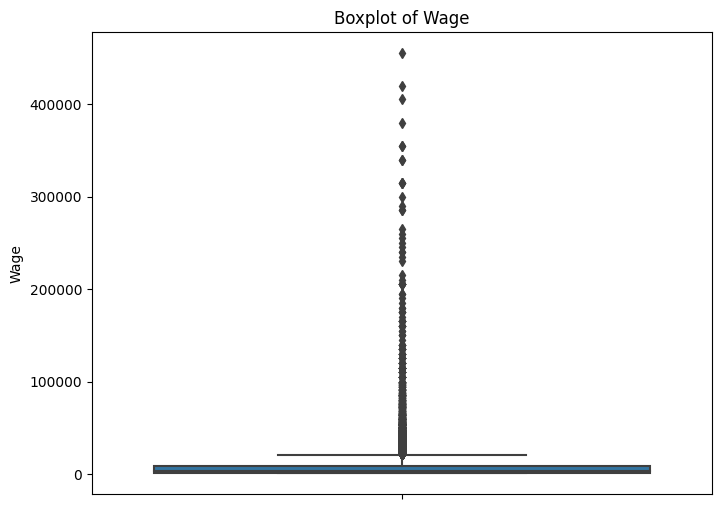

Total players above 2.0IQR + Q1 for Wage: 1890
Names: ['P. Gazzaniga', 'Z. Junuzović', 'T. Lees', 'F. Fajr', 'M. Zárate', 'O. Al Soma', 'E. Schelotto', 'M. Pérez', 'D. Alli', 'C. Beauvue', 'C. Cathcart', 'J. Locadia', 'N. Nkoulou', 'R. Zieler', 'D. Latza', 'Loren', 'E. Salvio', 'A. Mejía', 'Álvaro Tejero', 'E. Rigoni', 'Cucurella', 'E. Giaccherini', 'S. Taïder', 'M. Hefele', 'M. Kempf', 'M. Guendouzi', 'W. Ndidi', 'P. Tachtsidis', 'Fred', 'A. Ramsey', 'F. Diabaté', 'Manu García', 'Medrán', 'O. Bayram', 'A. Tameze', 'D. Ward', 'L. Peltier', 'G. Ramírez', 'Y. Ravet', 'Jonas', 'N. Barella', 'A. Szymanowski', 'Kiko Casilla', 'J. Boateng', 'E. Ofori', 'M. Arnautović', 'R. Ibarra', 'O. Onazi', 'M. Gradel', 'Pol Lirola', 'A. Smith', 'H. Traoré', 'M. Dawson', 'F. Forestieri', 'R. Gagliardini', 'P. Schick', 'M. Lemina', 'B. Gibson', 'F. Fazio', 'D. Berardi', 'Vinícius', 'Fidalgo', 'O. Jiménez', 'D. Odoi', 'L. Damour', 'Jorge Molina', 'Sergio Busquets', 'J. Butterfield', 'Lekue', 'L. Insigne', '

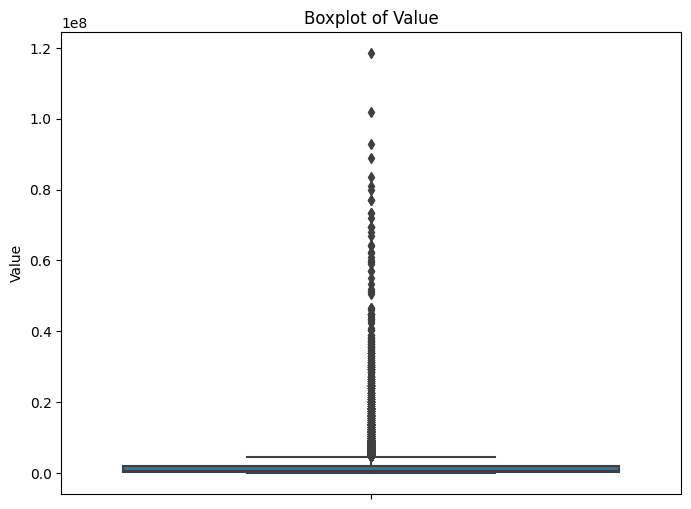

Total players above 2.0IQR + Q1 for Value: 2188
Names: ['P. Gazzaniga', 'Z. Junuzović', 'F. Fajr', 'M. Zárate', 'Dani Rochelinhas', 'O. Al Soma', 'Fábio Espinho', 'M. Pérez', 'D. Alli', 'S. Coopman', 'C. Beauvue', 'Ronaldo Vieira', 'C. Cathcart', 'Murilo', 'Guilherme', 'J. Locadia', 'N. Nkoulou', 'R. Zieler', 'D. Latza', 'Loren', 'E. Salvio', 'Róber', 'A. Mejía', 'E. Rigoni', 'João Novais', 'E. Giaccherini', 'S. Taïder', 'D. Kourmpelis', 'M. Kempf', 'M. Guendouzi', 'Iñigo Pérez', 'W. Ndidi', 'Fred', 'A. Ramsey', 'Manu García', 'Medrán', 'A. Umar', 'M. Demiral', 'A. Tameze', 'K. Frei', 'G. Ramírez', 'Pozo', 'Y. Ravet', 'Jonas', 'S. Larsson', 'N. Barella', 'A. Szymanowski', 'Osvaldo Lodeiro', 'Melendo', 'Kiko Casilla', 'J. Boateng', 'E. Ofori', 'M. Arnautović', 'R. Ibarra', 'O. Onazi', 'M. Gradel', 'David Simão', 'Pol Lirola', 'A. Smith', 'H. Traoré', 'Rafa', 'André Martins', 'F. Forestieri', 'R. Gagliardini', 'Rubén Alcaraz', 'P. Schick', 'M. Lemina', 'B. Gibson', 'F. Fazio', 'D. Berard

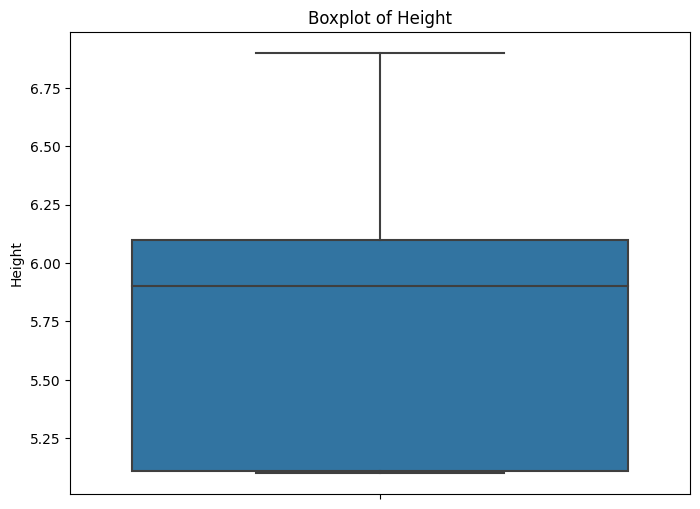

Total players above 2.0IQR + Q1 for Height: 0
Names: []

Total players below 2.0IQR - Q3 for Height: 0
Names: []



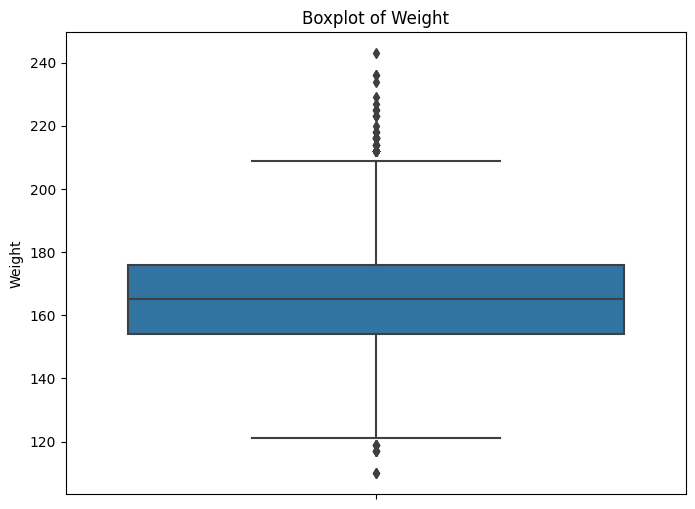

Total players above 2.0IQR + Q1 for Weight: 270
Names: ['H. Weydandt', 'Guilherme', 'M. Hefele', 'L. Szukała', 'R. Zentner', 'P. Mlapa', 'Lucas Tagliapietra', 'C. Kazim-Richards', 'C. Rivas', 'A. Gignac', 'J. Fejzić', 'V. Milinković-Savić', 'Juli Freitinho', 'F. Noguera', 'M. Pavlović', 'H. Maguire', 'S. Johnson', 'A. Vaikla', 'S. Polter', 'S. Ruprecht', 'M. Sissoko', 'O. Söderberg', 'J. Gleeson', 'S. Mai', 'Paulao Junqueiras', 'F. Tingager', 'C. Doyle', 'V. Myhra', 'K. Letheren', 'L. Unnerstall', 'R. Czichos', 'F. Andersson', 'Qiu Shengjiong', 'G. Arias', 'M. Kuttin', 'Y. Amankwah', 'M. Smith', 'F. Uzoho', 'B. Myhill', 'L. Jonsson', 'A. Cerri', 'J. Vestergaard', 'J. Debrah', 'S. Stevens', 'T. Okubo', 'K. Mbodji', 'M. Benatia', 'Wen Zhixiang', 'W. Boly', 'Willian José', 'T. Kister', 'M. Ošs', 'R. Lukaku', 'S. Rondón', 'Miguel Oliveira', 'A. Ba', 'U. Đerić', 'A. Rossi', 'J. Musso', 'K. Ajer', 'R. Gilmartin', 'J. Rasheed', 'Raúl Fernández', 'R. Green', 'M. Budimir', 'Roberto', 'Y. Gómez 

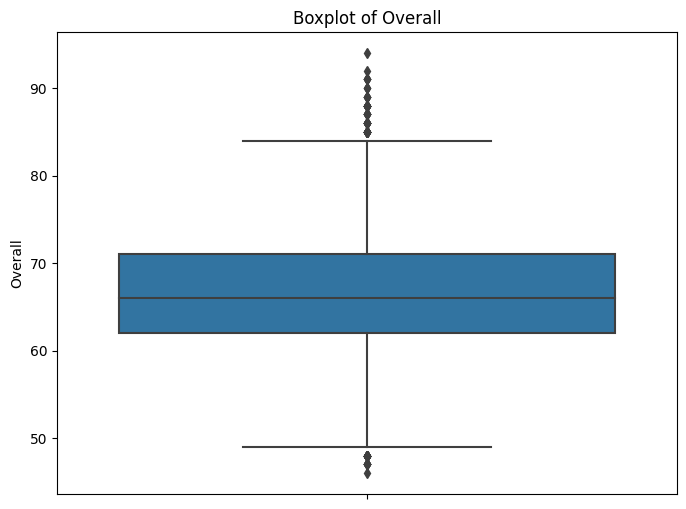

Total players above 2.0IQR + Q1 for Overall: 302
Names: ['D. Alli', 'E. Salvio', 'Fred', 'A. Ramsey', 'Jonas', 'J. Boateng', 'M. Arnautović', 'F. Fazio', 'Sergio Busquets', 'L. Insigne', 'Falcao', 'F. Smolov', 'Sergio Asenjo', 'D. Payet', 'T. Meunier', 'A. Gómez', 'S. Khedira', 'H. Maguire', 'P. Zieliński', 'E. Hazard', 'Oscar', 'R. Jarstein', 'Hulk', 'A. Lopes', 'D. Subašić', 'X. Shaqiri', 'Willian', 'S. Milinković-Savić', 'A. Di María', 'Anderson Talisca', 'W. Szczęsny', 'A. Florenzi', 'Taison', 'Cristiano Ronaldo', 'A. Barzagli', 'K. Bellarabi', 'David Luiz', 'Felipe', 'H. Lloris', 'D. Sánchez', 'J. Vertonghen', 'Pedro', 'Jonathan Viera', 'N. Matić', 'M. Benatia', 'L. Hrádecký', 'Willian José', 'Parejo', 'Sokratis', 'S. Agüero', 'Koke', 'D. De Rossi', 'D. Wass', 'R. Lukaku', 'Coutinho', 'T. Partey', 'L. Bonucci', 'A. Rami', 'Morata', 'Fabián', 'Dani Alves', 'Casemiro', 'Rafinha', 'A. Correa', 'G. Medel', 'E. Džeko', 'Grimaldo', 'G. Sigurðsson', 'Vitolo', 'Lucas Leiva', 'J. Pavlenka'

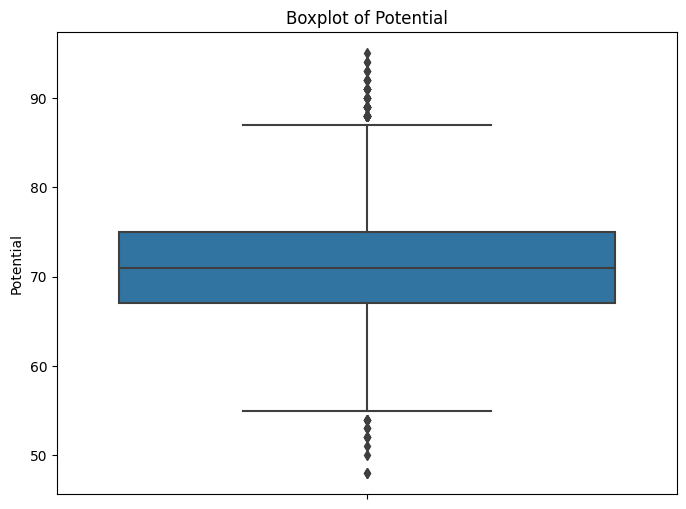

Total players above 2.0IQR + Q1 for Potential: 434
Names: ['D. Alli', 'M. Guendouzi', 'W. Ndidi', 'Fred', 'E. Brignola', 'Jonas', 'N. Barella', 'J. Boateng', 'P. Pellegri', 'P. Schick', 'Sergio Busquets', 'L. Insigne', 'L. Shaw', 'Falcao', 'N. Zaniolo', 'M. Romero', 'Sergio Asenjo', 'A. Danjuma Groeneveld', 'D. Payet', 'A. Gómez', 'S. Khedira', 'B. Gilmour', 'P. Retsos', 'H. Maguire', 'André Silva', 'R. Gumny', 'P. Zieliński', 'E. Hazard', 'J. Mateta', 'M. Saracchi', 'L. Mai', 'Oscar', 'J. Kluivert', 'A. Lopes', 'D. Brooks', 'Renato Sanches', 'T. Kehrer', 'S. Kalu', 'E. Audero', 'A. Lafont', 'A. Barák', 'A. Golovin', 'Mario Hermoso', 'T. Chong', 'Willian', 'J. Veretout', 'S. Milinković-Savić', 'A. Di María', 'Héctor Bellerín', 'Adama', 'J. Grealish', 'Anderson Talisca', 'M. Almirón', 'N. Vlašić', 'Denis Suárez', 'A. Morelos', 'W. Szczęsny', 'C. Pavón', 'Cristiano Ronaldo', 'B. Chilwell', 'A. Barzagli', 'M. Ødegaard', 'Gedson Fernandes', 'R. Griffiths', 'H. Lloris', 'L. Dendoncker', 'D.

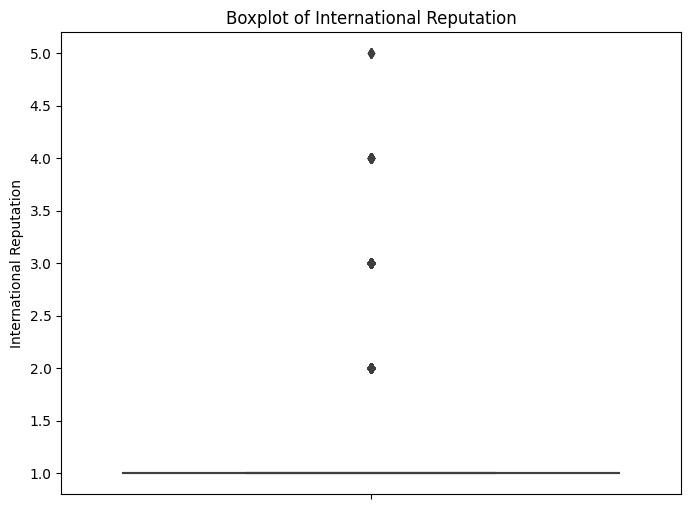

Total players above 2.0IQR + Q1 for International Reputation: 1182
Names: ['J. Rodwell', 'Z. Junuzović', 'F. Fajr', 'M. Zárate', 'O. Al Soma', 'D. Alli', 'Guilherme', 'M. Oršić', 'N. Nkoulou', 'R. Zieler', 'E. Salvio', 'A. Abdi', 'E. Giaccherini', 'S. Taïder', 'P. Tachtsidis', 'A. Ramsey', 'Bruno Alves', 'G. Ramírez', 'Lee Chung Yong', 'Jonas', 'N. Barella', 'M. Rybus', 'A. Szymanowski', 'Kiko Casilla', 'J. Boateng', 'Osmar', 'M. Arnautović', 'M. Gradel', 'Rafa', 'M. Dawson', 'R. Gagliardini', 'P. Schick', 'M. Lemina', 'F. Fazio', 'D. Berardi', 'C. Kazim-Richards', 'Hernâni', 'Sergio Busquets', 'R. van Rhijn', 'Adriano', 'L. Insigne', 'L. Shaw', 'Falcao', 'A. Maher', 'A. Gignac', 'A. Szalai', 'J. Okore', 'S. Kalou', 'L. Karius', 'Eder', 'M. Noble', 'J. Baumgartlinger', 'A. Ljajić', 'Y. Gouffran', 'Carles Gil', 'M. Ogasawara', 'P. Zabaleta', 'M. Coco', 'R. Pizarro', 'Sergio Asenjo', 'Borja Bastón', 'D. Payet', 'Sidnei', 'E. Bičakčić', 'L. Castro', 'M. Pedersen', 'T. Meunier', 'J. Morris

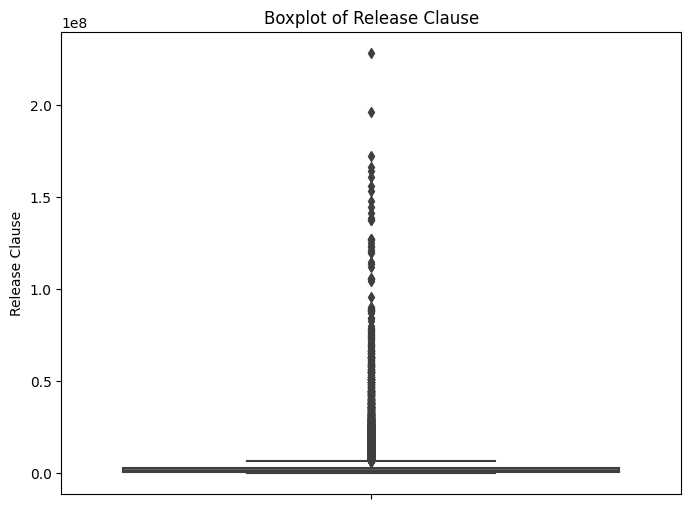

Total players above 2.0IQR + Q1 for Release Clause: 2375
Names: ['P. Gazzaniga', 'Y. Soteldo', 'Z. Junuzović', 'T. Lees', 'F. Fajr', 'M. Zárate', 'Dani Rochelinhas', 'O. Al Soma', 'E. Schelotto', 'Fábio Espinho', 'M. Pérez', 'D. Alli', 'S. Coopman', 'Ronaldo Vieira', 'C. Cathcart', 'Murilo', 'Guilherme', 'M. Oršić', 'J. Locadia', 'N. Nkoulou', 'R. Zieler', 'D. Latza', 'F. Schnellhardt', 'Loren', 'E. Salvio', 'L. Koutris', 'A. Mejía', 'E. Rigoni', 'João Novais', 'E. Giaccherini', 'D. Kourmpelis', 'M. Kempf', 'M. Guendouzi', 'Iñigo Pérez', 'W. Ndidi', 'P. Tachtsidis', 'Fred', 'A. Ramsey', 'T. Moulin', 'F. Diabaté', 'Manu García', 'E. Brignola', "E. N'Dicka", 'A. Umar', 'A. Tameze', 'K. Frei', 'D. Ward', 'G. Ramírez', 'Pozo', 'Y. Ravet', 'Jonas', 'S. Larsson', 'N. Barella', 'M. Rybus', 'A. Szymanowski', 'Osvaldo Lodeiro', 'Melendo', 'Kiko Casilla', 'J. Boateng', 'M. Arnautović', 'M. Abeid', 'R. Ibarra', 'O. Onazi', 'M. Gradel', 'David Simão', 'Pol Lirola', 'A. Smith', 'H. Traoré', 'Rafa',

In [49]:
# List of columns to analyze
columns_to_analyze = ['Age', 'Wage', 'Value', 'Height', 'Weight', 'Overall', 'Potential', 'International Reputation', 'Release Clause']

# Loop through columns to analyze
for col in columns_to_analyze:
    # Create a boxplot for the current column
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

    # Calculate IQR, Q1, and Q3 for the current column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds
    upper_bound = 2.0 * IQR + Q1
    lower_bound = Q1 - 2.0 * IQR

    # Find players above 2.0IQR + Q1 and below 2.0IQR - Q3
    outliers_above = df[(df[col] > upper_bound)]
    outliers_below = df[(df[col] < lower_bound)]

    # Display the total count of such players and their names
    print(f"Total players above 2.0IQR + Q1 for {col}: {len(outliers_above)}")
    print(f"Names: {outliers_above['Name'].tolist()}\n")

    print(f"Total players below 2.0IQR - Q3 for {col}: {len(outliers_below)}")
    print(f"Names: {outliers_below['Name'].tolist()}\n")

    print("="*50)

1. Outliers could signal errors in data or data collection, prompting investigation.
2. Outliers can impact data distribution and assumptions for tests or models.
3. Outliers skew summary stats like mean, affecting centrality representation.
4. Outliers can affect model performance differently across algorithms.
5. Outliers influence interpretations and conclusions drawn from analysis.
6. Outliers might be significant or misleading based on context and domain expertise.

8. Check the Categorical variables and Find if there is any data imbalance in any column also find if any cardinality problem      exists

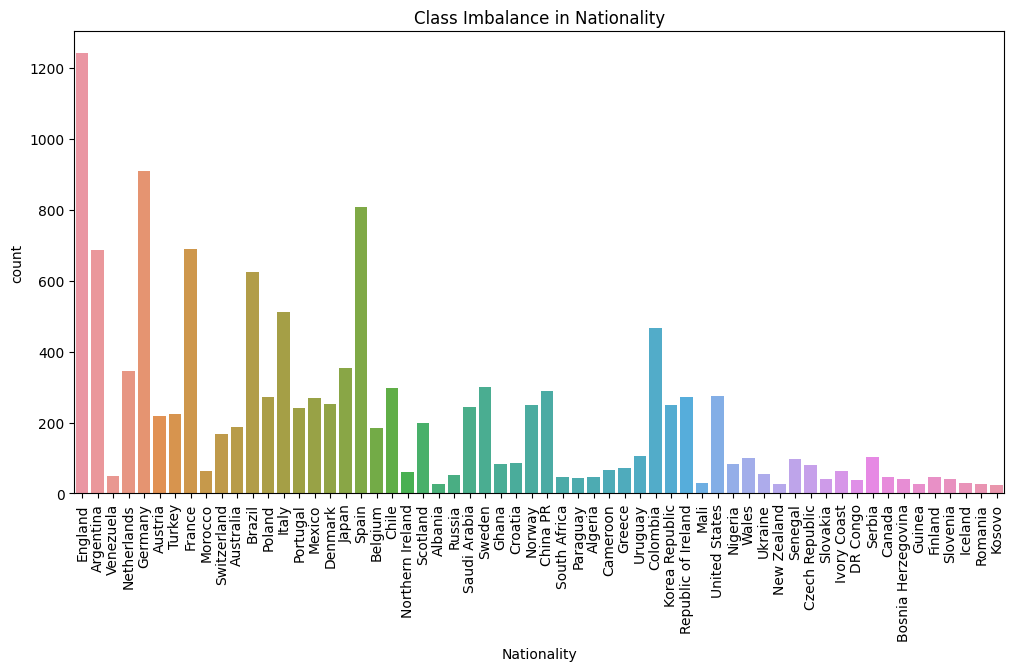

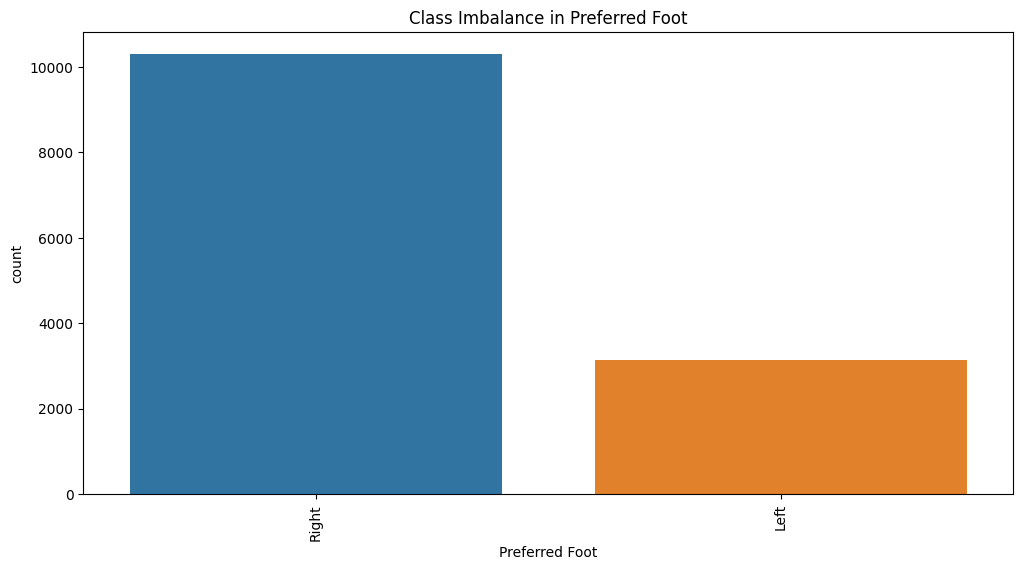

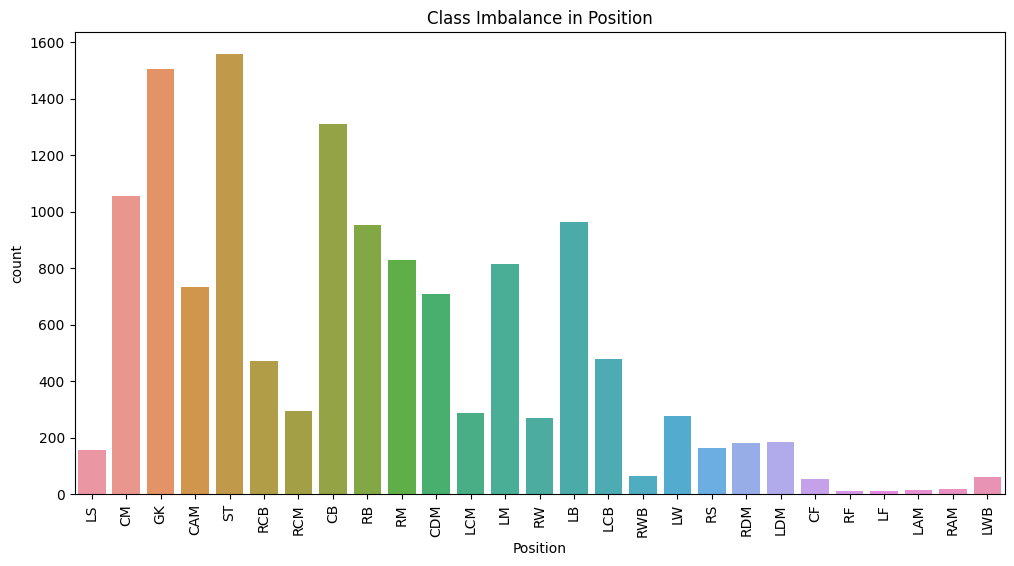

Data imbalance ratio in 'Nationality': 1240.00
Data imbalance ratio in 'Preferred Foot': 3.28
Data imbalance ratio in 'Position': 129.83
Cardinality of 'Nationality': 159
Cardinality of 'Preferred Foot': 2
Cardinality of 'Position': 27


In [55]:
# Define the categorical columns for analysis
categorical_columns = ['Nationality', 'Preferred Foot', 'Position']

# Visualize class imbalance using count plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    
    # For 'Nationality' column, display a subset of categories (top N) for better readability
    if column == 'Nationality':
        N = 60  # Specify the number of top categories to display
        top_nationalities = df[column].value_counts().head(N).index
        subset_data = df[df[column].isin(top_nationalities)]
        sns.countplot(data=subset_data, x=column)
    else:
        sns.countplot(data=df, x=column)
    
    plt.title(f'Class Imbalance in {column}')
    plt.xticks(rotation=90)
    plt.show()

# Check for data imbalance in categorical columns
for column in categorical_columns:
    value_counts = df[column].value_counts()
    imbalance_ratio = value_counts.max() / value_counts.min()
    print(f"Data imbalance ratio in '{column}': {imbalance_ratio:.2f}")

# Check cardinality (number of unique values) in categorical columns
for column in categorical_columns:
    cardinality = df[column].nunique()
    print(f"Cardinality of '{column}': {cardinality}")


9. Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

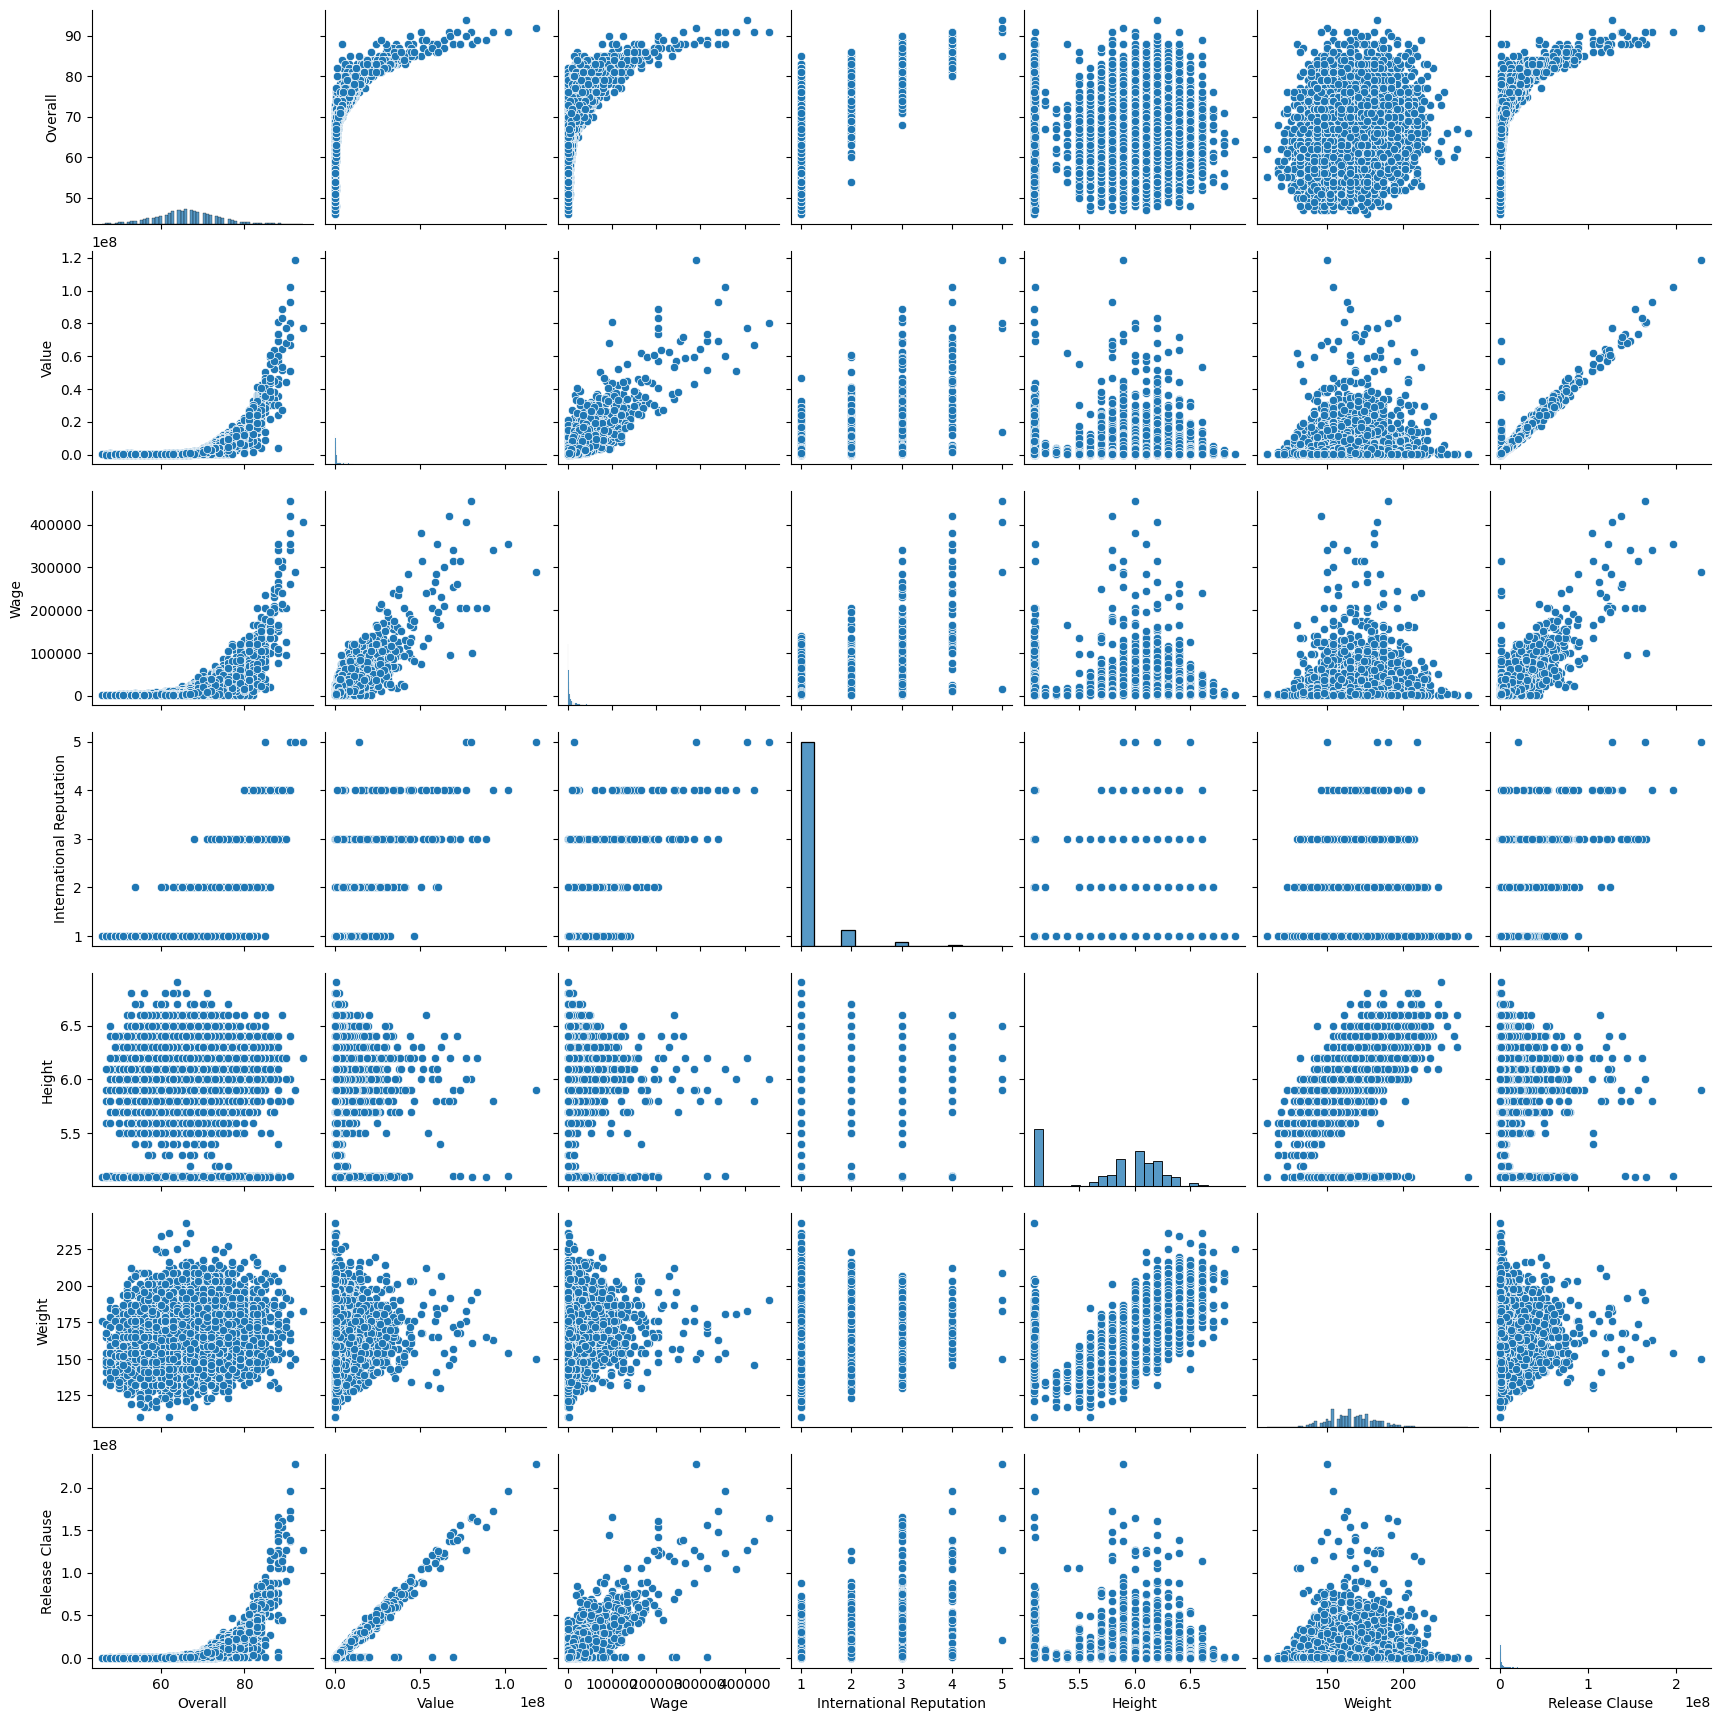

In [56]:
# Select the variables for pair plots
variables_for_pair_plot = ['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']

# Generate pair plots
sns.pairplot(df[variables_for_pair_plot])
plt.show()

10. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
    1. What would the average wage for this set of players be?
    2. What is the average age?
    3. Is there a correlation between the Overall rating and Value for these players? If Yes what kind of relationship that the    features have, also explain why this kind of relationship could happen.

In [57]:
top_players_2020 = df[df['Contract Valid Until'].dt.year == 2020].sort_values(by='Overall', ascending=False).head(20)

# Display the table of top 20 players
print(top_players_2020[['Name', 'Overall', 'Contract Valid Until']])

                  Name  Overall Contract Valid Until
15989     Sergio Ramos       91           2020-01-01
6869         L. Modrić       91           2020-01-01
20448           De Gea       91           2020-01-01
963          E. Hazard       91           2020-01-01
20440     G. Chiellini       89           2020-01-01
13954     Thiago Silva       88           2020-01-01
5874        C. Eriksen       88           2020-01-01
9293        D. Mertens       87           2020-01-01
8867        Jordi Alba       87           2020-01-01
13876         K. Navas       87           2020-01-01
2478        M. Benatia       86           2020-01-01
21044  T. Alderweireld       86           2020-01-01
16377      Alex Sandro       86           2020-01-01
3595          E. Džeko       85           2020-01-01
13899            Naldo       85           2020-01-01
2549            Parejo       85           2020-01-01
22893    José Callejón       84           2020-01-01
1146          A. Lopes       84           2020

In [58]:
# Calculate the average wage for the top 20 players with contracts expiring in 2020
average_wage = top_players_2020['Wage'].mean()

# Display the average wage
print(f"The average wage for the top 20 players with contracts expiring in 2020 is: {average_wage}")

The average wage for the top 20 players with contracts expiring in 2020 is: 181050.0


In [59]:
# Calculate the average age for the top 20 players with contracts expiring in 2020
average_age = top_players_2020['Age'].mean()

# Display the average age
print(f"The average age for the top 20 players with contracts expiring in 2020 is: {average_age:.2f}")

The average age for the top 20 players with contracts expiring in 2020 is: 30.25


In [60]:
# Calculate the correlation between Overall rating and Value for the top 20 players with contracts expiring in 2020
correlation = top_players_2020['Overall'].corr(top_players_2020['Value'])

# Display the correlation
print(f"The correlation between Overall rating and Value for the top 20 players is: {correlation:.2f}")

The correlation between Overall rating and Value for the top 20 players is: 0.77


The correlation coefficient of 0.77 between the Overall rating and Value for the top 20 players suggests a strong positive linear relationship between these two features. This means that as the Overall rating of a player increases, their Value tends to increase as well.

11. Generate tables containing the top 5 players by Overall rating for each unique position.
     1. Are there any players appearing at more than one table? Please point out such players.
     2. What is the average wage one can expect to pay for the top 5 in every position?

In [61]:
# Group the data by unique positions and find the top 5 players by Overall rating in each position
top_players_by_position = df.groupby('Position', group_keys=False).apply(lambda x: x.nlargest(5, 'Overall'))

# Display the tables for top 5 players by Overall rating for each unique position
for position, group in top_players_by_position.groupby('Position'):
    print(f"Top 5 players for position '{position}':")
    print(group[['Name', 'Overall']])
    print("=" * 50)

Top 5 players for position 'CAM':
                Name  Overall
5874      C. Eriksen       88
10841        M. Özil       86
14052      T. Müller       86
4675        A. Vidal       85
19850  R. Nainggolan       85
Top 5 players for position 'CB':
              Name  Overall
20937     D. Godín       90
21260    S. Umtiti       87
2478    M. Benatia       86
10090  N. Otamendi       85
13899        Naldo       85
Top 5 players for position 'CDM':
                  Name  Overall
394    Sergio Busquets       89
3292          Casemiro       88
2450          N. Matić       84
5584  William Carvalho       84
9464     Javi Martínez       83
Top 5 players for position 'CF':
                  Name  Overall
5757           Raffael       81
8964         L. Stindl       81
16272         A. Milik       81
23535  Ricardo Goulart       79
4670          Y. Ōsako       76
Top 5 players for position 'CM':
                     Name  Overall
1489  S. Milinković-Savić       85
4180          I. Gündoğan      

In [78]:
position_data = {
    'CAM': [
        {'Name': 'C. Eriksen', 'Overall': 88},
        {'Name': 'M. Özil', 'Overall': 86},
        {'Name': 'T. Müller', 'Overall': 86},
        {'Name': 'A. Vidal', 'Overall': 85},
        {'Name': 'R. Nainggolan', 'Overall': 85}
    ],
    'CB': [
        {'Name': 'D. Godín', 'Overall': 90},
        {'Name': 'S. Umtiti', 'Overall': 87},
        {'Name': 'M. Benatia', 'Overall': 86},
        {'Name': 'N. Otamendi', 'Overall': 85},
        {'Name': 'Naldo', 'Overall': 85}
    ],
    'CDM': [
        {'Name': 'Sergio Busquets', 'Overall': 89},
        {'Name': 'Casemiro', 'Overall': 88},
        {'Name': 'N. Matić', 'Overall': 84},
        {'Name': 'William Carvalho', 'Overall': 84},
        {'Name': 'Javi Martínez', 'Overall': 83}
    ],
    'CF': [
        {'Name': 'Raffael', 'Overall': 81},
        {'Name': 'L. Stindl', 'Overall': 81},
        {'Name': 'A. Milik', 'Overall': 81},
        {'Name': 'Ricardo Goulart', 'Overall': 79},
        {'Name': 'Y. Ōsako', 'Overall': 76}
    ],
    'CM': [
        {'Name': 'S. Milinković-Savić', 'Overall': 85},
        {'Name': 'I. Gündoğan', 'Overall': 84},
        {'Name': 'Jorginho', 'Overall': 84},
        {'Name': 'N. Keïta', 'Overall': 83},
        {'Name': 'A. Rabiot', 'Overall': 83}
    ],
    'GK': [
        {'Name': 'De Gea', 'Overall': 91},
        {'Name': 'J. Oblak', 'Overall': 90},
        {'Name': 'T. Courtois', 'Overall': 89},
        {'Name': 'H. Lloris', 'Overall': 88},
        {'Name': 'G. Buffon', 'Overall': 88}
    ],
    'LAM': [
        {'Name': 'J. Rodríguez', 'Overall': 88},
        {'Name': 'D. Tadić', 'Overall': 81},
        {'Name': 'Fabrio Farinha', 'Overall': 75},
        {'Name': 'Nicolás Formido', 'Overall': 74},
        {'Name': 'Leordinho Paes', 'Overall': 72}
    ],
    'LB': [
        {'Name': 'Marcelo', 'Overall': 88},
        {'Name': 'Jordi Alba', 'Overall': 87},
        {'Name': 'Alex Sandro', 'Overall': 86},
        {'Name': 'Marcos Alonso', 'Overall': 83},
        {'Name': 'L. Hernández', 'Overall': 82}
    ],
    'LCB': [
        {'Name': 'G. Chiellini', 'Overall': 89},
        {'Name': 'M. Hummels', 'Overall': 88},
        {'Name': 'J. Vertonghen', 'Overall': 87},
        {'Name': 'V. van Dijk', 'Overall': 86},
        {'Name': 'K. Manolas', 'Overall': 85}
    ],
    'LCM': [
        {'Name': 'M. Verratti', 'Overall': 86},
        {'Name': 'D. Alli', 'Overall': 84},
        {'Name': 'Bruno Fernandes', 'Overall': 84},
        {'Name': 'Oscar', 'Overall': 83},
        {'Name': 'M. Kovačić', 'Overall': 83}
    ],
    'LDM': [
        {'Name': 'Paulinho', 'Overall': 85},
        {'Name': 'Marquinhos', 'Overall': 84},
        {'Name': 'Lucas Leiva', 'Overall': 83},
        {'Name': 'C. Aránguiz', 'Overall': 81},
        {'Name': 'M. Brozović', 'Overall': 81}
    ],
    'LF': [
        {'Name': 'E. Hazard', 'Overall': 91},
        {'Name': 'P. Dybala', 'Overall': 89},
        {'Name': 'Iniesta', 'Overall': 86},
        {'Name': 'Jonathan Viera', 'Overall': 82},
        {'Name': 'J. Campbell', 'Overall': 76}
    ],
    'LM': [
        {'Name': 'P. Aubameyang', 'Overall': 88},
        {'Name': 'M. Reus', 'Overall': 86},
        {'Name': 'Douglas Costa', 'Overall': 86},
        {'Name': 'Koke', 'Overall': 85},
        {'Name': 'Y. Brahimi', 'Overall': 85}
    ],
    'LS': [
        {'Name': 'G. Higuaín', 'Overall': 88},
        {'Name': 'Diego Costa', 'Overall': 85},
        {'Name': 'A. Gómez', 'Overall': 84},
        {'Name': 'Gerard Moreno', 'Overall': 83},
        {'Name': 'M. Arnautović', 'Overall': 82}
    ],
    'LW': [
        {'Name': 'Neymar Jr', 'Overall': 92},
        {'Name': 'L. Insigne', 'Overall': 88},
        {'Name': 'Coutinho', 'Overall': 88},
        {'Name': 'Isco', 'Overall': 88},
        {'Name': 'L. Sané', 'Overall': 86}
    ],
    'LWB': [
        {'Name': 'Jonny', 'Overall': 79},
        {'Name': 'Granell', 'Overall': 79},
        {'Name': 'J. Mojica', 'Overall': 78},
        {'Name': 'B. Oczipka', 'Overall': 77},
        {'Name': 'E. Insúa', 'Overall': 76}
    ],
    'RAM': [
        {'Name': 'J. Cuadrado', 'Overall': 84},
        {'Name': 'H. Ziyech', 'Overall': 83},
        {'Name': 'Allan Bardinho', 'Overall': 75},
        {'Name': 'Kauã Abranches', 'Overall': 74},
        {'Name': 'Sebas Couteira', 'Overall': 74}
    ],
    'RB': [
        {'Name': 'Azpilicueta', 'Overall': 86},
        {'Name': 'Carvajal', 'Overall': 84},
        {'Name': 'K. Walker', 'Overall': 84},
        {'Name': 'L. Bender', 'Overall': 83},
        {'Name': 'A. Florenzi', 'Overall': 82}
    ],
    'RCB': [
        {'Name': 'Sergio Ramos', 'Overall': 91},
        {'Name': 'Thiago Silva', 'Overall': 88},
        {'Name': 'Piqué', 'Overall': 87},
        {'Name': 'L. Bonucci', 'Overall': 86},
        {'Name': 'T. Alderweireld', 'Overall': 86}
    ],
    'RCM': [
        {'Name': 'K. De Bruyne', 'Overall': 91},
        {'Name': 'L. Modrić', 'Overall': 91},
        {'Name': 'S. Khedira', 'Overall': 85},
        {'Name': 'Parejo', 'Overall': 85},
        {'Name': 'J. Kimmich', 'Overall': 85}
    ],
    'RDM': [
        {'Name': 'P. Pogba', 'Overall': 87},
        {'Name': 'Illarramendi', 'Overall': 84},
        {'Name': 'D. De Rossi', 'Overall': 83},
        {'Name': 'I. Gueye', 'Overall': 83},
        {'Name': 'M. Parolo', 'Overall': 82}
    ],
    'RF': [
        {'Name': 'D. Mertens', 'Overall': 87},
        {'Name': 'D. Valeri', 'Overall': 80},
        {'Name': 'L. Podolski', 'Overall': 78},
        {'Name': 'C. Falletti', 'Overall': 72},
        {'Name': 'Zhang Xizhe', 'Overall': 72}
    ],
    'RM': [
        {'Name': 'M. Salah', 'Overall': 88},
        {'Name': 'K. Mbappé', 'Overall': 88},
        {'Name': 'A. Di María', 'Overall': 84},
        {'Name': 'A. Robben', 'Overall': 84},
        {'Name': 'Quaresma', 'Overall': 84}
    ],
    'RS': [
        {'Name': 'L. Suárez', 'Overall': 91},
        {'Name': 'Z. Ibrahimović', 'Overall': 85},
        {'Name': 'Falcao', 'Overall': 84},
        {'Name': 'W. Ben Yedder', 'Overall': 82},
        {'Name': 'Deulofeu', 'Overall': 80}
    ],
    'RW': [
        {'Name': 'Bernardo Silva', 'Overall': 86},
        {'Name': 'R. Mahrez', 'Overall': 85},
        {'Name': 'Willian', 'Overall': 84},
        {'Name': 'Lucas Vázquez', 'Overall': 83},
        {'Name': 'Ronaldo Cabrais', 'Overall': 83}
    ],
    'RWB': [
        {'Name': 'S. Coleman', 'Overall': 80},
        {'Name': 'P. Kadeřábek', 'Overall': 80},
        {'Name': 'M. Ginter', 'Overall': 80},
        {'Name': 'K. Lala', 'Overall': 77},
        {'Name': 'R. Aguilar', 'Overall': 77}
    ],
    'ST': [
        {'Name': 'Cristiano Ronaldo', 'Overall': 94},
        {'Name': 'R. Lewandowski', 'Overall': 90},
        {'Name': 'S. Agüero', 'Overall': 89},
        {'Name': 'H. Kane', 'Overall': 89},
        {'Name': 'G. Bale', 'Overall': 88}
    ]
}


In [80]:
all_names = set()
repeated_names = set()

for position, players in position_data.items():
    for player in players:
        if player['Name'] in all_names:
            repeated_names.add(player['Name'])
        all_names.add(player['Name'])

if repeated_names:
    print("Repeated Names:", repeated_names)
else:
    print("No repeated names found.")


No repeated names found.


In [84]:
average_wages = []

for position, players in position_data.items():
    player_names = [player['Name'] for player in players[:5]]
    position_avg_wage = df[df['Name'].isin(player_names)]['Wage'].mean()
    average_wages.append((position, position_avg_wage))

# Display the average wages for each position
for position, average_wage in average_wages:
    print(f"Position: {position}, Average Wage: {average_wage}")


Position: CAM, Average Wage: 120571.42857142857
Position: CB, Average Wage: 104142.85714285714
Position: CDM, Average Wage: 179400.0
Position: CF, Average Wage: 42000.0
Position: CM, Average Wage: 122800.0
Position: GK, Average Wage: 164200.0
Position: LAM, Average Wage: 34538.46153846154
Position: LB, Average Wage: 136428.57142857142
Position: LCB, Average Wage: 158200.0
Position: LCM, Average Wage: 93200.0
Position: LDM, Average Wage: 63000.0
Position: LF, Average Wage: 103000.0
Position: LM, Average Wage: 131200.0
Position: LS, Average Wage: 95500.0
Position: LW, Average Wage: 261000.0
Position: LWB, Average Wage: 28333.333333333332
Position: RAM, Average Wage: 39333.333333333336
Position: RB, Average Wage: 97571.42857142857
Position: RCB, Average Wage: 219000.0
Position: RCM, Average Wage: 218600.0
Position: RDM, Average Wage: 105000.0
Position: RF, Average Wage: 38600.0
Position: RM, Average Wage: 134000.0
Position: RS, Average Wage: 99285.71428571429
Position: RW, Average Wage: 1

# Statistical Analysis

1. Test statistically whether the Left-hand player’s overall rating is higher than the Right-hand overall score. Alpha = 0.05
   Before checking the test, Kindly make sure data is normally distributed

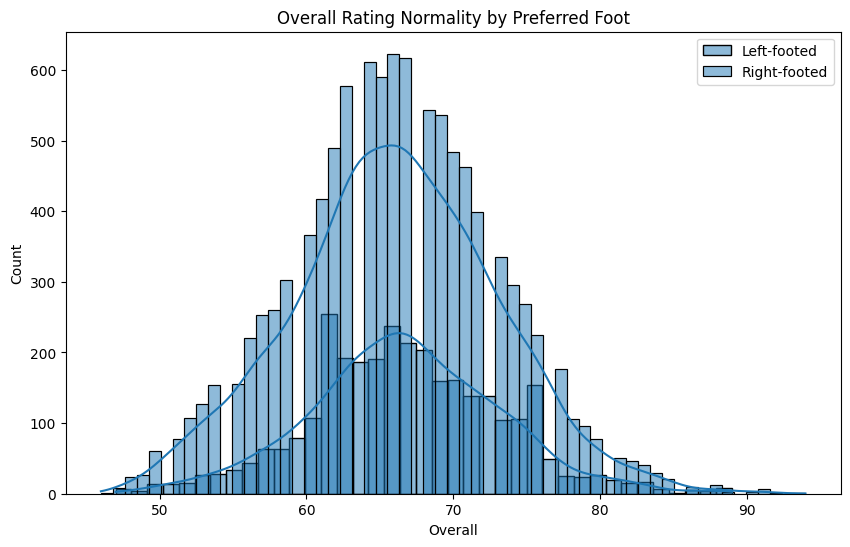

In [62]:
# Filter data for left-footed and right-footed players
left_footed = df[df['Preferred Foot'] == 'Left']
right_footed = df[df['Preferred Foot'] == 'Right']

# Visualize normality using histograms and Q-Q plots
plt.figure(figsize=(10, 6))

sns.histplot(left_footed['Overall'], kde=True, label='Left-footed')
sns.histplot(right_footed['Overall'], kde=True, label='Right-footed')

plt.title('Overall Rating Normality by Preferred Foot')
plt.legend()
plt.show()


In [64]:
import scipy.stats as stats
# Shapiro-Wilk normality test
shapiro_test_left = stats.shapiro(left_footed['Overall'])
shapiro_test_right = stats.shapiro(right_footed['Overall'])

print("Shapiro-Wilk Test for Normality:")
print("Left-footed Players - p-value:", shapiro_test_left.pvalue)
print("Right-footed Players - p-value:", shapiro_test_right.pvalue)

Shapiro-Wilk Test for Normality:
Left-footed Players - p-value: 7.571559379471182e-09
Right-footed Players - p-value: 1.3075140234029229e-14


Since the Shapiro-Wilk test indicates that the data for both left-footed and right-footed players does not follow a normal distribution, it would be more appropriate to use non-parametric tests or techniques that do not rely on the assumption of normality.
A suitable non-parametric test for comparing two independent samples is the Mann-Whitney U test (also known as the Wilcoxon rank-sum test). This test assesses whether the distributions of two groups are equal or if one group tends to have larger values.

In [65]:
# Filter data for left-footed and right-footed players
left_footed = df[df['Preferred Foot'] == 'Left']
right_footed = df[df['Preferred Foot'] == 'Right']

# Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(left_footed['Overall'], right_footed['Overall'])

print("Mann-Whitney U Test:")
print("U statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between groups.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference between groups.")

Mann-Whitney U Test:
U statistic: 17013883.5
p-value: 5.494513414830842e-06
Reject the null hypothesis. There is a statistically significant difference between groups.


2. Does the age factor affect the player’s potential? Check the claim that the players who are greater than 35, their potential    will be lesser than those whose age is less than 35. Alpha = 0.05

In [66]:
# Define significance level (alpha)
alpha = 0.05

# Split data into two groups: players older than 35 and players younger than 35
older_than_35 = df[df['Age'] > 35]
younger_than_35 = df[df['Age'] <= 35]

# Perform two-sample independent t-test
statistic, p_value = stats.ttest_ind(older_than_35['Potential'], younger_than_35['Potential'])

print("Two-Sample T-Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in potential.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in potential.")

Two-Sample T-Test:
Test Statistic: -7.4090491018755635
p-value: 1.3479734889237093e-13
Reject the null hypothesis. There is a statistically significant difference in potential.


3. Use the statistical test to check the relationship between the Preferred Foot and Position with the 99% confident interval.

In [71]:
# Create a two-way contingency table
contingency_table = pd.crosstab(df['Preferred Foot'], df['Position'])

# Perform Chi-squared test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Define significance level (alpha)
alpha = 0.01  # 99% confidence level

print("Chi-Squared Test of Independence:")
print("Chi-Squared statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

# Interpret the results
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Preferred Foot and Position.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Preferred Foot and Position.")

Chi-Squared Test of Independence:
Chi-Squared statistic: 3317.8621171922264
p-value: 0.0
Degrees of Freedom: 26
Reject the null hypothesis. There is a significant relationship between Preferred Foot and Position.


4. Does the International Reputation cause a significant effect on players' Wages? Check the claim with a 0.04 significance        level. Check the Normality of data before the actual test.

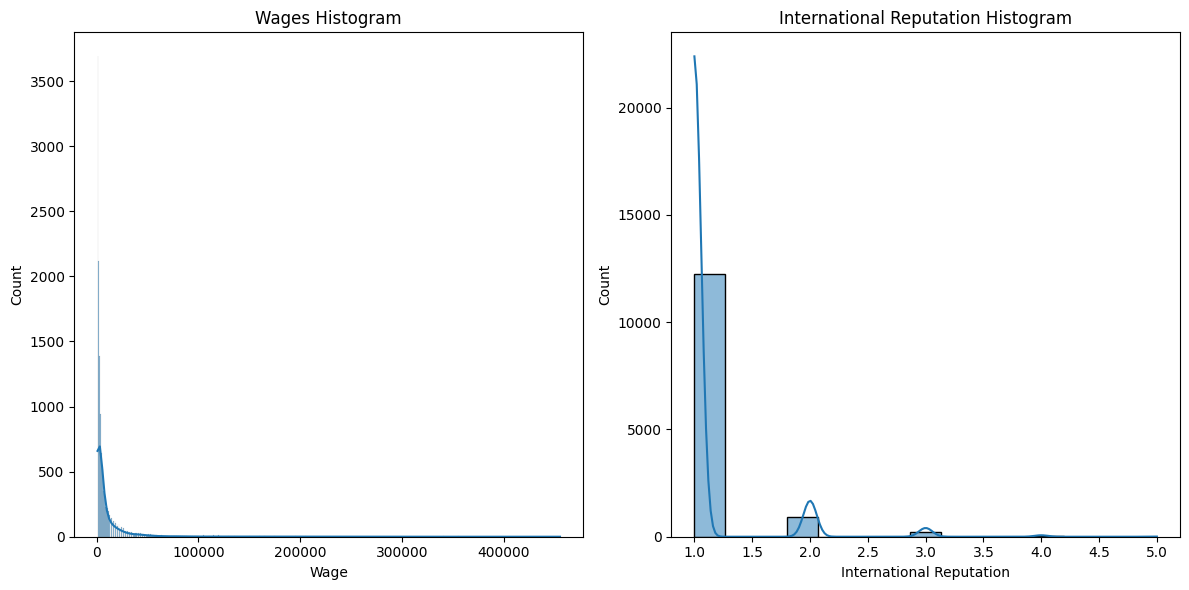

Shapiro-Wilk Test for Normality:
Wage - p-value: 0.0
International Reputation - p-value: 0.0


In [73]:
# Visualize the histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Wage'], kde=True)
plt.title('Wages Histogram')

plt.subplot(1, 2, 2)
sns.histplot(df['International Reputation'], kde=True)
plt.title('International Reputation Histogram')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk normality test
shapiro_test_wage = stats.shapiro(df['Wage'])
shapiro_test_reputation = stats.shapiro(df['International Reputation'])

print("Shapiro-Wilk Test for Normality:")
print("Wage - p-value:", shapiro_test_wage.pvalue)
print("International Reputation - p-value:", shapiro_test_reputation.pvalue)

Since the data for both the International Reputation and Wages variables is not normally distributed based on the Shapiro-Wilk test, you can use a non-parametric test to assess the relationship between these variables. One such test is the Spearman's rank correlation coefficient test.

Spearman's rank correlation assesses the strength and direction of the monotonic relationship between two variables. It doesn't assume a specific distribution for the data and is appropriate for non-normally distributed data.

In [74]:
# Perform Spearman's rank correlation test
correlation, p_value = stats.spearmanr(df['International Reputation'], df['Wage'])

# Define significance level (alpha)
alpha = 0.04

print("Spearman's Rank Correlation Test:")
print("Spearman's Rank Correlation coefficient:", correlation)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between International Reputation and Wages.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between International Reputation and Wages.")

Spearman's Rank Correlation Test:
Spearman's Rank Correlation coefficient: 0.40145249173972847
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between International Reputation and Wages.


5. Check the claim that the median wages of under top 20 players are lesser than or equal to 25000. Test the claim with a 0.05 %    significance level. Check the data is normally distributed or not before the testing the claim statistically.

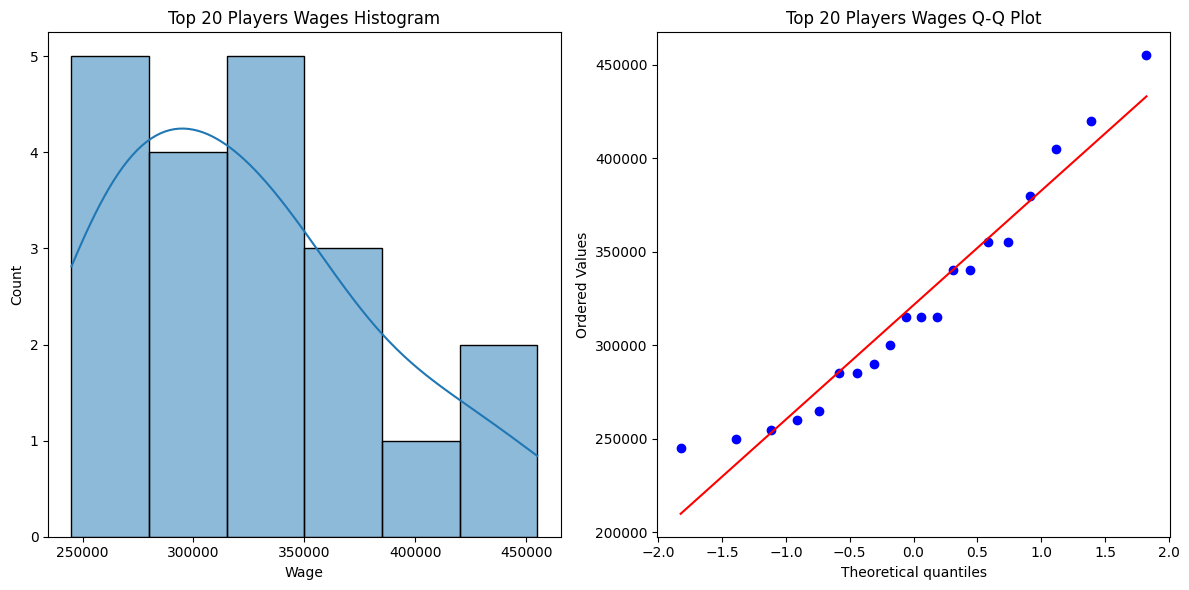

Shapiro-Wilk Test for Normality (Top 20 Players Wages):
p-value: 0.2358333170413971
The data for top 20 players' wages is normally distributed.


In [75]:
# Sort the dataframe by wages in descending order
sorted_df = df.sort_values(by='Wage', ascending=False)

# Select the top 20 players
top_20 = sorted_df.head(20)

# Check normality using histograms and Shapiro-Wilk test
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(top_20['Wage'], kde=True)
plt.title('Top 20 Players Wages Histogram')

plt.subplot(1, 2, 2)
stats.probplot(top_20['Wage'], dist='norm', plot=plt)
plt.title('Top 20 Players Wages Q-Q Plot')

plt.tight_layout()
plt.show()

# Shapiro-Wilk normality test
shapiro_test_top_20 = stats.shapiro(top_20['Wage'])

print("Shapiro-Wilk Test for Normality (Top 20 Players Wages):")
print("p-value:", shapiro_test_top_20.pvalue)

# Define significance level (alpha) for hypothesis testing
alpha = 0.05

# Interpret the results of the normality test
if shapiro_test_top_20.pvalue < alpha:
    print("The data for top 20 players' wages is not normally distributed.")
else:
    print("The data for top 20 players' wages is normally distributed.")

In [76]:
# Sort the dataframe by wages in descending order
sorted_df = df.sort_values(by='Wage', ascending=False)

# Select the top 20 players
top_20 = sorted_df.head(20)

# Define the claim median and significance level
claim_median = 25000
alpha = 0.05

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(top_20['Wage'], claim_median)

print("One-Sample T-Test:")
print("Test Statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. The claim that the median wages are less than or equal to $25,000 is supported.")
else:
    print("Fail to reject the null hypothesis. The claim that the median wages are less than or equal to $25,000 is not supported.")

One-Sample T-Test:
Test Statistic: 22.254068611992405
p-value: 4.532014124520241e-15
Reject the null hypothesis. The claim that the median wages are less than or equal to $25,000 is supported.


In [ ]:
****************************************************************************************************************************

# REPORT

A new football club named ‘Brussels United FC’ has just been inaugurated.The team needs 20 possible players to choose from. We have been requested to formulate a report in order to help the management make a decision regarding potential players.


In [85]:
df.to_csv('df_final.csv', index=False)

In [4]:
report=pd.read_csv('df_final.csv')

In [5]:
report

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,Contract Valid Until,Height,Weight,Release Clause,International Reputation,Position
0,240331,P. Camará,21,Guinea Bissau,58,69,220000.0,1000.0,Right,2019-01-01,6.1,161.0,429000.0,1.0,LS
1,183465,J. Rodwell,27,England,68,68,925000.0,16000.0,Right,2019-01-01,6.2,172.0,1800000.0,2.0,CM
2,205186,P. Gazzaniga,26,Argentina,74,78,5000000.0,46000.0,Right,2022-01-01,6.5,198.0,9600000.0,1.0,GK
3,233531,Y. Soteldo,21,Venezuela,71,81,3800000.0,6000.0,Right,2018-01-01,5.3,121.0,6100000.0,1.0,CAM
4,243718,R. Koot,18,Netherlands,56,68,120000.0,1000.0,Right,2020-01-01,6.1,176.0,198000.0,1.0,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13431,242116,M. Etuin,22,France,62,69,425000.0,2000.0,Left,2020-01-01,5.9,143.0,829000.0,1.0,CM
13432,237387,D. Dalling,19,England,54,71,150000.0,1000.0,Right,2019-01-01,5.9,154.0,379000.0,1.0,CAM
13433,223132,K. Keleş,30,Turkey,68,68,650000.0,7000.0,Left,2019-01-01,5.9,148.0,1300000.0,1.0,LB
13434,237745,H. Miyazawa,29,Japan,63,63,350000.0,1000.0,Right,2021-01-01,6.0,159.0,438000.0,1.0,CB


In [6]:
report.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Preferred Foot               object
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
International Reputation    float64
Position                     object
dtype: object

# Formation, Style and Budget estimation

In [35]:
import pandas as pd

# Calculate the average wage per position
average_wage_per_position = report.groupby('Position')['Wage'].mean()

# Calculate the 40th percentile wage per position
percentile_70th_wage_per_position = report.groupby('Position')['Wage'].quantile(0.7)

# Display the results
print("Average Wage per Position:")
print(average_wage_per_position)

print("\n70th Percentile Wage per Position:")
print(percentile_70th_wage_per_position)



Average Wage per Position:
Position
CAM    10137.602180
CB      7569.794050
CDM     9453.521127
CF     10777.777778
CM      8424.242424
GK      6808.100930
LAM    33714.285714
LB      9024.896266
LCB    11941.422594
LCM    12662.020906
LDM    11553.763441
LF     51076.923077
LM      9618.872549
LS     14806.451613
LW     14173.913043
LWB     8800.000000
RAM    20235.294118
RB      8695.697796
RCB    13227.176221
RCM    14320.945946
RDM    12486.187845
RF     20416.666667
RM      9634.939759
RS     15475.609756
RW     14074.349442
RWB     7553.846154
ST      9971.758665
Name: Wage, dtype: float64

70th Percentile Wage per Position:
Position
CAM     8000.0
CB      5000.0
CDM     7000.0
CF     12000.0
CM      5000.0
GK      4000.0
LAM    18500.0
LB      6000.0
LCB    10000.0
LCM    11200.0
LDM    10000.0
LF     19800.0
LM      7000.0
LS     14000.0
LW      7500.0
LWB     7000.0
RAM    19400.0
RB      6000.0
RCB    10000.0
RCM    10000.0
RDM    12000.0
RF     13400.0
RM      8000.0
RS     

A balanced-aggressive playing style can be well-suited to formations like 4-3-3 and 3-4-3. These formations provide a good balance between attack and defense, with a focus on maintaining possession, creating scoring opportunities, and pressing the opponent high up the field. In a 4-3-3 formation, three forwards and three central midfielders provide attacking options while maintaining a solid midfield presence.

For a 4-3-3 formation with a balanced-aggressive playing style, the selected positions are:

Goalkeeper (GK)
Right Back (RB)
Left Back (LB)
Center Back (CB)
Center Back (CB)
Central Defensive Midfielder (CDM)
Left Center Midfielder (LCM)
Right Center Midfielder (RCM)
Right Winger (RW)
Left Winger (LW)
Center Forward (ST)

GK (Backup)
RB (Backup)
LB (Backup)
CB (Backup)
ST (Backup)
CM (Backup)
CAM (Backup)
LM (Backup)
RM (Backup)

These are the positions we are going forward with for the final team.

In [8]:
selected_positions = ['GK', 'RB', 'LB', 'CB', 'CB', 'CDM', 'LCM', 'RCM', 'RW', 'LW', 'ST']
average_wage_per_position = report[report['Position'].isin(selected_positions)].groupby('Position')['Wage'].mean()

print("Average Wage per Position:")
print(average_wage_per_position)


Average Wage per Position:
Position
CB      7569.794050
CDM     9453.521127
GK      6808.100930
LB      9024.896266
LCM    12662.020906
LW     14173.913043
RB      8695.697796
RCM    14320.945946
RW     14074.349442
ST      9971.758665
Name: Wage, dtype: float64


As this might have so many low quality players, the average can be misleading. 

In [9]:
import numpy as np

selected_positions = ['GK', 'RB', 'LB', 'CB', 'CB', 'CDM', 'LCM', 'RCM', 'RW', 'LW', 'ST']

wage_percentiles = np.arange(70, 101)

for position in selected_positions:
    wages = report[report['Position'] == position]['Wage']
    percentile_wages = np.percentile(wages, wage_percentiles)
    average_wage_percentile = np.mean(percentile_wages)
    
    print(f"Average Wage for {position}: {average_wage_percentile}")


Average Wage for GK: 23769.354838709678
Average Wage for RB: 26334.1935483871
Average Wage for LB: 29966.129032258068
Average Wage for CB: 24300.000000000015
Average Wage for CB: 24300.000000000015
Average Wage for CDM: 31335.806451612876
Average Wage for LCM: 34623.2258064516
Average Wage for RCM: 42683.87096774198
Average Wage for RW: 41150.96774193547
Average Wage for LW: 43129.032258064515
Average Wage for ST: 34983.87096774196


This is a much better estimation to consider players whose wages are more than the 70th percentile.

In [10]:
import numpy as np

selected_positions = ['GK', 'RB', 'LB', 'CB', 'CB', 'CDM', 'LCM', 'RCM', 'RW', 'LW', 'ST']
wage_percentiles = np.arange(70, 101)

for position in selected_positions:
    wages = report[(report['Position'] == position) & (report['Overall'] > 70)]['Wage']
    percentile_wages = np.percentile(wages, wage_percentiles)
    average_wage_percentile = np.mean(percentile_wages)
    
    print(f"Average Wage for {position}: {average_wage_percentile}")


Average Wage for GK: 53919.99999999998
Average Wage for RB: 56700.64516129033
Average Wage for LB: 67709.67741935483
Average Wage for CB: 58094.516129032265
Average Wage for CB: 58094.516129032265
Average Wage for CDM: 62706.45161290319
Average Wage for LCM: 54450.64516129032
Average Wage for RCM: 72401.29032258058
Average Wage for RW: 83776.12903225805
Average Wage for LW: 101625.16129032255
Average Wage for ST: 72054.51612903226


Total Budget: 777903.8709677419

In [11]:
backup_positions = ['GK', 'RB', 'LB', 'CB', 'ST', 'CM', 'CAM', 'LM', 'RM']

wage_percentiles = np.arange(70, 101)

for position in backup_positions:
    wages = report[(report['Position'] == position) & (report['Overall'] > 70)]['Wage']
    percentile_wages = np.percentile(wages, wage_percentiles)
    average_wage_percentile = np.mean(percentile_wages)
    
    print(f"Average Wage for {position}: {average_wage_percentile}")


Average Wage for GK: 53919.99999999998
Average Wage for RB: 56700.64516129033
Average Wage for LB: 67709.67741935483
Average Wage for CB: 58094.516129032265
Average Wage for ST: 72054.51612903226
Average Wage for CM: 73337.09677419355
Average Wage for CAM: 58481.93548387097
Average Wage for LM: 57761.29032258065
Average Wage for RM: 59214.83870967741


Budget for backup ≈ 572275.50502897097

# Moneyball

Total budget is 14M. We are going with Moneyball approach and make the best value for money picks.
We are not looking for celebrities. We want players who are below 30 years of age. Above 70 overall. With a release clause that is not too high.
With value higher than what we pay for the release. Looking to fill players who can play the positions we have planned.

In [12]:
report.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,Contract Valid Until,Height,Weight,Release Clause,International Reputation,Position
0,240331,P. Camará,21,Guinea Bissau,58,69,220000.0,1000.0,Right,2019-01-01,6.1,161.0,429000.0,1.0,LS
1,183465,J. Rodwell,27,England,68,68,925000.0,16000.0,Right,2019-01-01,6.2,172.0,1800000.0,2.0,CM
2,205186,P. Gazzaniga,26,Argentina,74,78,5000000.0,46000.0,Right,2022-01-01,6.5,198.0,9600000.0,1.0,GK
3,233531,Y. Soteldo,21,Venezuela,71,81,3800000.0,6000.0,Right,2018-01-01,5.3,121.0,6100000.0,1.0,CAM
4,243718,R. Koot,18,Netherlands,56,68,120000.0,1000.0,Right,2020-01-01,6.1,176.0,198000.0,1.0,GK


In [13]:
selected_positions = ['GK', 'RB', 'LB', 'CB', 'CB', 'CDM', 'LCM', 'RCM', 'RW', 'LW', 'ST']

average_release_clauses = {}

for position in selected_positions:
    filtered_players = report[(report['Position'] == position) & (report['Overall'] > 70) & (report['Overall'] < 80) ]
    average_release_clause = np.mean(filtered_players['Release Clause'])
    average_release_clauses[position] = average_release_clause

print("Average Release Clause per Position:")
for position, avg_release_clause in average_release_clauses.items():
    print(f"{position}: {avg_release_clause}")


Average Release Clause per Position:
GK: 6130318.84057971
RB: 7897115.384615385
LB: 8144977.777777778
CB: 7889646.808510638
CDM: 8562500.0
LCM: 9533411.214953272
RCM: 10542940.0
RW: 10367187.5
LW: 12018032.786885247
ST: 9544207.31707317


In [15]:
selected_positions = ['GK', 'RB', 'LB', 'CB', 'CDM', 'LCM', 'RCM', 'RW', 'LW', 'ST', 'CM', 'CAM', 'LM', 'RM']
min_overall = 70

filtered_df = report[(report['Position'].isin(selected_positions)) & (report['Overall'] > min_overall) & (report['Age'] < 31)]

# Display the filtered DataFrame
print(filtered_df)


           ID              Name  Age Nationality  Overall  Potential  \
2      205186      P. Gazzaniga   26   Argentina       74         78   
3      233531        Y. Soteldo   21   Venezuela       71         81   
6      173474      Z. Junuzović   30     Austria       78         78   
11     205083           F. Fajr   29     Morocco       78         78   
16     230274  Dani Rochelinhas   26      Brazil       75         75   
...       ...               ...  ...         ...      ...        ...   
13417  228295        R. Holding   22     England       76         83   
13420  179574         G. Hooper   30     England       73         73   
13425  215177          F. Cerro   30   Argentina       72         72   
13428  189148         J. Murphy   28    Scotland       72         72   
13429  226299         B. Róchez   23    Honduras       71         76   

            Value     Wage Preferred Foot Contract Valid Until  Height  \
2       5000000.0  46000.0          Right           2022-01-0

In [16]:
filtered_df_sorted = filtered_df.sort_values(by='Release Clause')

# Display the sorted filtered DataFrame
print(filtered_df_sorted)



           ID          Name  Age         Nationality  Overall  Potential  \
12387  207650     E. Krafth   23              Sweden       74         78   
3207   224242  D. Luckassen   22         Netherlands       73         77   
12220  230072      R. Bajić   24  Bosnia Herzegovina       71         76   
5729   206590     Moi Gómez   24               Spain       74         79   
1130   220837    D. Machado   24            Colombia       71         75   
...       ...           ...  ...                 ...      ...        ...   
12190  197781          Isco   26               Spain       88         91   
9809   202126       H. Kane   24             England       89         91   
8568   231747     K. Mbappé   19              France       88         95   
4706   192985  K. De Bruyne   27             Belgium       91         92   
5109   190871     Neymar Jr   26              Brazil       92         93   

             Value      Wage Preferred Foot Contract Valid Until  Height  \
12387    60

In [17]:
filtered_df['Release Clause'].mean()

14880867.579908676

In [21]:
filtered_df_value = filtered_df[filtered_df['Value'] > filtered_df['Release Clause']]

# Display the filtered DataFrame
print(filtered_df_filtered)


           ID          Name  Age Nationality  Overall  Potential       Value  \
34     183068    C. Beauvue   30      France       75         75   6500000.0   
39     214685      P. Rubio   29       Chile       72         72   3100000.0   
100    239231     Cucurella   19       Spain       71         82   3400000.0   
106    198760     S. Taïder   26     Algeria       76         76   8000000.0   
152    212476        Medrán   24       Spain       75         81   9000000.0   
...       ...           ...  ...         ...      ...        ...         ...   
13045  222077  M. Locatelli   20       Italy       75         83   8500000.0   
13134  146947         Vesga   25       Spain       72         77   3500000.0   
13139  193198     N. Gudelj   26      Serbia       78         80  10500000.0   
13148  208268  B. Cristante   23       Italy       78         86  15000000.0   
13379  208892      S. Byram   24     England       72         75   3300000.0   

          Wage Preferred Foot Contract 

In [22]:
filtered_df_value.sort_values(by='Overall',ascending=False)

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,Contract Valid Until,Height,Weight,Release Clause,International Reputation,Position
1560,212523,Anderson Talisca,24,Brazil,83,90,36500000.0,18000.0,Left,2018-12-31,6.30,176.0,1100000.0,2.0,CAM
8657,207410,M. Kovačić,24,Croatia,83,89,35000000.0,165000.0,Right,2019-06-30,5.90,172.0,1100000.0,3.0,LCM
7676,203890,S. Vrsaljko,26,Croatia,81,84,18000000.0,57000.0,Right,2019-06-30,5.11,168.0,1100000.0,2.0,RB
11239,226226,G. Lo Celso,22,Argentina,80,86,20000000.0,72000.0,Left,2019-06-30,5.90,154.0,1100000.0,1.0,RCM
2474,219809,T. Bakayoko,23,France,80,85,17000000.0,85000.0,Right,2019-06-30,6.20,187.0,1100000.0,2.0,LCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10949,205990,H. Reed,23,England,71,78,2800000.0,22000.0,Right,2019-06-30,5.90,159.0,1100000.0,1.0,RM
4954,224967,M. Sylla,24,Senegal,71,75,3100000.0,13000.0,Right,2019-06-30,5.90,165.0,1100000.0,1.0,RM
8198,212381,R. Insigne,24,Italy,71,75,3100000.0,31000.0,Left,2019-06-30,5.80,143.0,1100000.0,1.0,RW
4501,223074,D. Rotariu,22,Romania,71,78,3300000.0,14000.0,Left,2019-06-30,5.11,159.0,1100000.0,1.0,RW


In [25]:
position_counts = filtered_df_value['Position'].value_counts()

# Display the count of players for each unique position
print(position_counts)


ST     38
GK     20
CB     19
CDM    17
CAM    17
RM     17
CM     13
RW     11
LCM    11
LM     10
RB     10
LB      9
LW      9
RCM     6
Name: Position, dtype: int64


Let's go and select the best fitting players for each position and add them to the final roster

In [28]:
# Sort the filtered_df_value by the 'Value' column in descending order and get the top 4 for each position
top_value_players = filtered_df_value.sort_values(by='Value', ascending=False).groupby('Position').apply(lambda x: x.head(4))

# Sort the filtered_df_value by the 'Potential' column in descending order and get the top 4 for each position
top_potential_players = filtered_df_value.sort_values(by='Potential', ascending=False).groupby('Position').apply(lambda x: x.head(4))

# Sort the filtered_df_value by the 'Overall' column in descending order and get the top 4 for each position
top_overall_players = filtered_df_value.sort_values(by='Overall', ascending=False).groupby('Position').apply(lambda x: x.head(4))


In [29]:
top_value_players

ID               Name  Age  Nationality  Overall  \
Position                                                               
CAM      1560   212523   Anderson Talisca   24       Brazil       83   
         612    190544          A. Ljajić   26       Serbia       80   
         2903   210513        J. Quintero   25     Colombia       78   
         9322   201046        R. Saponara   26        Italy       78   
CB       7972   204311           K. Zouma   23       France       79   
         2100   212501      L. Dendoncker   23      Belgium       78   
         4641   201049         L. Tonelli   28        Italy       77   
         5001   215051           L. López   28    Argentina       77   
CDM      13139  193198          N. Gudelj   26       Serbia       78   
         13045  222077       M. Locatelli   20        Italy       75   
         8392   219712      S. Cristóforo   24      Uruguay       75   
         9474   216054       N. Domínguez   28    Argentina       76   
CM       4423   230938          F. Kessié   21  Ivory Coast       79   
         13148  208268       B. Cristante   23        Italy       78   
         798    220475          A. Grassi   23        Italy       75   
         152    212476             Medrán   24        Spain       75   
GK       521    203775          L. Karius   25      Germany       79   
         6943   206652        Sergio Rico   24        Spain       79   
         3638   243952           A. Lunin   19      Ukraine       76   
         11395  216065      M. Sportiello   26        Italy       78   
LB       9104   235212          A. Hakimi   19      Morocco       78   
         11096  232656       T. Hernández   20       France       77   
         3438   236295       Aarón Martín   21        Spain       77   
         5204   190034   T. Kolodziejczak   26       France       75   
LCM      8657   207410         M. Kovačić   24      Croatia       83   
         2474   219809        T. Bakayoko   23       France       80   
         2368   233064           M. Mount   19      England       75   
         106    198760          S. Taïder   26      Algeria       76   
LM       6665   211381          S. Boufal   24      Morocco       77   
         7521   222943               Jony   26        Spain       77   
         7152   206225       D. Cheryshev   27       Russia       77   
         4170   222467                Ivi   24        Spain       75   
LW       8419   229593           M. Pjaca   23      Croatia       76   
         1614   226215       Sabin Merino   26        Spain       75   
         8461   239482             Galeno   20       Brazil       73   
         10613  192342         E. Cardona   25     Colombia       74   
RB       7676   203890        S. Vrsaljko   26      Croatia       81   
         5477   232270     T. Fosu-Mensah   20  Netherlands       74   
         12387  207650          E. Krafth   23       Sweden       74   
         3913   191210         S. Corchia   27       France       75   
RCM      11239  226226        G. Lo Celso   22    Argentina       80   
         11416  223273         M. Pašalić   23      Croatia       76   
         9959   206306           J. Ferri   26       France       74   
         520    210111     José Rodríguez   23        Spain       73   
RM       2720   215785           K. Baldé   23      Senegal       80   
         2605   228414    Matheus Pereira   22       Brazil       76   
         3632   203299        A. Carrillo   27         Peru       78   
         11332  219571           Camarasa   24        Spain       76   
RW       10847  204233         C. Musonda   21      Belgium       75   
         7187   221701  Gabriel Boschilia   22       Brazil       76   
         1856   222665        M. Ødegaard   19       Norway       74   
         11186  206160       A. Ciciretti   24        Italy       74   
ST       854    228941        André Silva   22     Portugal       79   
         11869  234045        H. Onyekuru   21      Nigeria 

In [36]:
top_potential_players

ID                Name  Age  Nationality  Overall  \
Position                                                                
CAM      1560   212523    Anderson Talisca   24       Brazil       83   
         9771   223978         Manu García   20        Spain       73   
         3553   228650  Francisco Geraldes   23     Portugal       76   
         10123  222079           J. Onomah   21      England       71   
CB       2100   212501       L. Dendoncker   23      Belgium       78   
         7972   204311            K. Zouma   23       France       79   
         7484   214129         J. Barreiro   24     Colombia       72   
         6057   216778        Rúben Semedo   24     Portugal       74   
CDM      13045  222077        M. Locatelli   20        Italy       75   
         6683   234078          O. Mangala   20      Belgium       71   
         9846   223498         E. Cecchini   23    Argentina       71   
         13139  193198           N. Gudelj   26       Serbia       78   
CM       4423   230938           F. Kessié   21  Ivory Coast       79   
         13148  208268        B. Cristante   23        Italy       78   
         798    220475           A. Grassi   23        Italy       75   
         5528   212269           R. Bazoer   21  Netherlands       74   
GK       3638   243952            A. Lunin   19      Ukraine       76   
         1305   228413           E. Audero   21        Italy       73   
         6943   206652         Sergio Rico   24        Spain       79   
         521    203775           L. Karius   25      Germany       79   
LB       9104   235212           A. Hakimi   19      Morocco       78   
         11096  232656        T. Hernández   20       France       77   
         3438   236295        Aarón Martín   21        Spain       77   
         7729   232708       M. Valenzuela   19    Argentina       71   
LCM      8657   207410          M. Kovačić   24      Croatia       83   
         2368   233064            M. Mount   19      England       75   
         2474   219809         T. Bakayoko   23       France       80   
         5729   206590           Moi Gómez   24        Spain       74   
LM       100    239231           Cucurella   19        Spain       71   
         4170   222467                 Ivi   24        Spain       75   
         6665   211381           S. Boufal   24      Morocco       77   
         2381   222644             Y. Asad   23    Argentina       73   
LW       8461   239482              Galeno   20       Brazil       73   
         8419   229593            M. Pjaca   23      Croatia       76   
         3783   224520             R. Kent   21      England       71   
         1155   225844            D. Verde   22        Italy       72   
RB       5477   232270      T. Fosu-Mensah   20  Netherlands       74   
         7676   203890         S. Vrsaljko   26      Croatia       81   
         12387  207650           E. Krafth   23       Sweden       74   
         5792   223765            R. Bauer   23      Germany       72   
RCM      11239  226226         G. Lo Celso   22    Argentina       80   
         11416  223273          M. Pašalić   23      Croatia       76   
         520    210111      José Rodríguez   23        Spain       73   
         2489   214358            J. Nieto   25     Colombia       72   
RM       2720   215785            K. Baldé   23      Senegal       80   
         2605   228414     Matheus Pereira   22       Brazil       76   
         11332  219571            Camarasa   24        Spain       76   
         10977  221982          P. Roberts   21      England       74   
RW       11789  233556         R. Orsolini   21        Italy       73   
         10847  204233          C. Musonda   21      Belgium       75   
         1856   222665         M. Ødegaard   19       Norway       74   
         7187   221701   Gabriel Boschilia   22       Brazil       76   
ST       854    228941         André Silva   22     Portugal       79   
     

In [31]:
top_overall_players

ID               Name  Age  Nationality  Overall  \
Position                                                               
CAM      1560   212523   Anderson Talisca   24       Brazil       83   
         612    190544          A. Ljajić   26       Serbia       80   
         2903   210513        J. Quintero   25     Colombia       78   
         9322   201046        R. Saponara   26        Italy       78   
CB       7972   204311           K. Zouma   23       France       79   
         2100   212501      L. Dendoncker   23      Belgium       78   
         4641   201049         L. Tonelli   28        Italy       77   
         2233   198584          K. Mbodji   28      Senegal       77   
CDM      13139  193198          N. Gudelj   26       Serbia       78   
         9474   216054       N. Domínguez   28    Argentina       76   
         8392   219712      S. Cristóforo   24      Uruguay       75   
         13045  222077       M. Locatelli   20        Italy       75   
CM       4423   230938          F. Kessié   21  Ivory Coast       79   
         13148  208268       B. Cristante   23        Italy       78   
         5493   202135         S. Sturaro   25        Italy       75   
         152    212476             Medrán   24        Spain       75   
GK       12636  176550          D. Ospina   29     Colombia       79   
         521    203775          L. Karius   25      Germany       79   
         6943   206652        Sergio Rico   24        Spain       79   
         11395  216065      M. Sportiello   26        Italy       78   
LB       9104   235212          A. Hakimi   19      Morocco       78   
         11096  232656       T. Hernández   20       France       77   
         3438   236295       Aarón Martín   21        Spain       77   
         5204   190034   T. Kolodziejczak   26       France       75   
LCM      8657   207410         M. Kovačić   24      Croatia       83   
         2474   219809        T. Bakayoko   23       France       80   
         106    198760          S. Taïder   26      Algeria       76   
         2368   233064           M. Mount   19      England       75   
LM       6665   211381          S. Boufal   24      Morocco       77   
         7152   206225       D. Cheryshev   27       Russia       77   
         7521   222943               Jony   26        Spain       77   
         4170   222467                Ivi   24        Spain       75   
LW       8419   229593           M. Pjaca   23      Croatia       76   
         1614   226215       Sabin Merino   26        Spain       75   
         10613  192342         E. Cardona   25     Colombia       74   
         6913   211176          R. Kishna   23  Netherlands       73   
RB       7676   203890        S. Vrsaljko   26      Croatia       81   
         3913   191210         S. Corchia   27       France       75   
         12387  207650          E. Krafth   23       Sweden       74   
         2130   204539       L. Advíncula   28         Peru       74   
RCM      11239  226226        G. Lo Celso   22    Argentina       80   
         11416  223273         M. Pašalić   23      Croatia       76   
         9959   206306           J. Ferri   26       France       74   
         520    210111     José Rodríguez   23        Spain       73   
RM       2720   215785           K. Baldé   23      Senegal       80   
         3632   203299        A. Carrillo   27         Peru       78   
         9732   193130        A. Schürrle   27      Germany       77   
         1110   176571            A. Ayew   28        Ghana       77   
RW       7187   221701  Gabriel Boschilia   22       Brazil       76   
         10847  204233         C. Musonda   21      Belgium       75   
         34     183068         C. Beauvue   30       France       75   
         1856   222665        M. Ødegaard   19       Norway       74   
ST       854    228941        André Silva   22     Portugal       79   
         5847   188955             G. Bou   28    Argentina 

Number of players required for each position 
GK:2
RB:2
LB:2
CB:3
CDM:1
LCM:1
RCM:1
RW:1
LW:1
ST:2
CM:1
CAM:1
LM:1
RM:1

Selected players comparing the top value, top potential and best overall
GK : 521, 6943
RB : 7676,5477
LB : 9104, 11096
CB : 7972, 2100, 4641
CDM : 13139
LCM : 8657
RCM : 11239
RW : 10847
LW : 8419
ST : 854, 8777 
CM : 4423
CAM : 1560
LM : 6665
RM : 2720

In [39]:
# Create an empty DataFrame named "roster"
roster = pd.DataFrame(columns=filtered_df_value.columns)

# List of indexes for selected players
selected_indexes = {
    'GK': [521, 6943],
    'RB': [7676, 5477],
    'LB': [9104, 11096],
    'CB': [7972, 2100, 4641],
    'CDM': [13139],
    'LCM': [8657],
    'RCM': [11239],
    'RW': [10847],
    'LW': [8419],
    'ST': [854, 8777],
    'CM': [4423],
    'CAM': [1560],
    'LM': [6665],
    'RM': [2720]
}

# Populate the "roster" DataFrame with selected players
for position, indexes in selected_indexes.items():
    selected_players = filtered_df_value.loc[indexes]
    roster = roster.append(selected_players)

# Reset the index of the "roster" DataFrame
roster.reset_index(drop=True, inplace=True)

roster


C:\Users\sanki\AppData\Local\Temp\ipykernel_22220\1281582690.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roster = roster.append(selected_players)
C:\Users\sanki\AppData\Local\Temp\ipykernel_22220\1281582690.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roster = roster.append(selected_players)
C:\Users\sanki\AppData\Local\Temp\ipykernel_22220\1281582690.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roster = roster.append(selected_players)
C:\Users\sanki\AppData\Local\Temp\ipykernel_22220\1281582690.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roster = roster.append(selected_players)
C:\Users\sanki\AppData\L

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,Contract Valid Until,Height,Weight,Release Clause,International Reputation,Position
0,203775,L. Karius,25,Germany,79,83,11500000.0,71000.0,Right,2020-05-31,6.20,192.0,1100000.0,2.0,GK
1,206652,Sergio Rico,24,Spain,79,83,11500000.0,13000.0,Right,2019-06-30,6.40,194.0,1100000.0,2.0,GK
2,203890,S. Vrsaljko,26,Croatia,81,84,18000000.0,57000.0,Right,2019-06-30,5.11,168.0,1100000.0,2.0,RB
3,232270,T. Fosu-Mensah,20,Netherlands,74,84,8000000.0,53000.0,Right,2019-06-30,6.10,172.0,1100000.0,1.0,RB
4,235212,A. Hakimi,19,Morocco,78,86,12500000.0,49000.0,Right,2020-06-30,5.11,161.0,1100000.0,1.0,LB
5,232656,T. Hernández,20,France,77,85,11000000.0,76000.0,Left,2019-06-30,6.00,181.0,1100000.0,1.0,LB
6,204311,K. Zouma,23,France,79,83,14000000.0,80000.0,Right,2019-06-30,6.30,212.0,1100000.0,2.0,CB
7,212501,L. Dendoncker,23,Belgium,78,84,12000000.0,18000.0,Right,2019-06-30,6.20,194.0,1100000.0,2.0,CB
8,201049,L. Tonelli,28,Italy,77,79,8500000.0,53000.0,Right,2019-06-30,6.00,172.0,1100000.0,2.0,CB
9,193198,N. Gudelj,26,Serbia,78,80,10500000.0,19000.0,Right,2019-06-30,6.20,161.0,1100000.0,2.0,CDM


In [40]:
total_wages = roster['Wage'].sum()
print("Total Wages in the Roster:", total_wages)

Total Wages in the Roster: 1202000.0


In [42]:
total_release = roster['Release Clause'].sum()
print("Total Wages in the Roster:", total_release)

Total Wages in the Roster: 22000000.0


You can see here that the wages paid is significantly lesser than the average wages paid.
This is how MONEYBALL works. These are the most underrated players with a huge upside and value.
This is where you save a lot of money and also get the best players. 

Cheers. let's win the cup.